In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import math 
import scipy.stats as stats

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
cu = pd.read_csv('EDA_customer_churn.csv')
tr = pd.read_csv('EDA_transaction2.csv')
pr = pd.read_csv('EDA_product.csv')

In [4]:
tr = tr.query('payment_status == "Success"')
tr['price'] = tr['item_price'] * tr['quantity']
tr = tr.drop(['session_id', 'payment_status', 'shipment_fee', 'shipment_date_limit', 'total_amount', 'quantity', 'item_price', 'shipment_time', 'distance(km)'], axis=1).reset_index(drop=True)
tr.head()

,created_at,customer_id,payment_method,promo_amount,promo_code,shipment_lat,shipment_long,product_id,year,customer_lat,customer_long,price
0,2018-07-29 15:22:01.458193+00:00,5868,Debit Card,1415,WEEKENDSERU,-8.227893,111.969107,44660,2018,-6.122897,106.876500,191247
1,2018-07-30 12:40:22.365620+00:00,4774,Credit Card,0,Not Promoted,3.013470,107.802514,16193,2018,-3.602334,120.363824,145526
2,2018-09-15 11:51:17.365620+00:00,4774,OVO,0,Not Promoted,-2.579428,115.743885,53686,2018,-3.602334,120.363824,540696
3,2018-11-01 11:23:48.365620+00:00,4774,Credit Card,0,Not Promoted,-3.602334,120.363824,20228,2018,-3.602334,120.363824,271012
4,2018-12-18 11:20:30.365620+00:00,4774,Credit Card,0,Not Promoted,-3.602334,120.363824,55220,2018,-3.602334,120.363824,198753


In [5]:
tr['transaction_month'] = pd.to_datetime(tr['created_at']).dt.to_period('M')
tr.head()

,created_at,customer_id,payment_method,promo_amount,promo_code,shipment_lat,shipment_long,product_id,year,customer_lat,customer_long,price,transaction_month
0,2018-07-29 15:22:01.458193+00:00,5868,Debit Card,1415,WEEKENDSERU,-8.227893,111.969107,44660,2018,-6.122897,106.876500,191247,2018-07
1,2018-07-30 12:40:22.365620+00:00,4774,Credit Card,0,Not Promoted,3.013470,107.802514,16193,2018,-3.602334,120.363824,145526,2018-07
2,2018-09-15 11:51:17.365620+00:00,4774,OVO,0,Not Promoted,-2.579428,115.743885,53686,2018,-3.602334,120.363824,540696,2018-09
3,2018-11-01 11:23:48.365620+00:00,4774,Credit Card,0,Not Promoted,-3.602334,120.363824,20228,2018,-3.602334,120.363824,271012,2018-11
4,2018-12-18 11:20:30.365620+00:00,4774,Credit Card,0,Not Promoted,-3.602334,120.363824,55220,2018,-3.602334,120.363824,198753,2018-12


In [6]:
tr.sort_values(by='created_at')

,created_at,customer_id,payment_method,promo_amount,promo_code,shipment_lat,shipment_long,product_id,year,customer_lat,customer_long,price,transaction_month
1200915,2016-06-30 23:18:44.792905+00:00,74089,LinkAja,0,Not Promoted,-0.763643,112.421541,33314,2016,-6.129814,106.957680,630795,2016-06
1150271,2016-07-01 02:53:26.720195+00:00,6183,OVO,6053,XX2022,-6.218370,106.888089,7588,2016,-0.042226,110.152487,411340,2016-07
1150270,2016-07-01 02:53:26.720195+00:00,6183,OVO,6053,XX2022,-6.218370,106.888089,16059,2016,-0.042226,110.152487,163539,2016-07
1150382,2016-07-01 09:45:51.803842+00:00,16228,Debit Card,0,Not Promoted,-2.617531,115.421835,47650,2016,-6.828293,107.895690,318792,2016-07
1200914,2016-07-01 22:32:45.218400+00:00,73773,Debit Card,0,Not Promoted,-1.066405,113.575300,32185,2016,-6.578046,108.145161,246670,2016-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
943134,2022-07-31 23:58:50.469277+00:00,81975,Debit Card,0,Not Promoted,-6.125269,106.961855,34120,2022,-6.125269,106.961855,265409,2022-07
943135,2022-07-31 23:58:50.469277+00:00,81975,Debit Card,0,Not Promoted,-6.125269,106.961855,29275,2022,-6.125269,106.961855,276340,2022-07
943076,2022-07-31 23:58:53.821469+00:00,19551,Credit Card,5800,WEEKENDSERU,-6.723003,111.355794,17773,2022,-6.235832,106.783260,140642,2022-07
943269,2022-07-31 23:59:03.408424+00:00,22285,LinkAja,0,Not Promoted,0.185578,112.415543,27404,2022,0.185578,112.415543,150339,2022-07


In [7]:
# 2016-06월 데이터는 하나 존재 >> 이상치로 간주 후, 데이터 삭제
tr = tr.drop([1200752], axis=0)
df = tr.sort_values(by='created_at')
df

,created_at,customer_id,payment_method,promo_amount,promo_code,shipment_lat,shipment_long,product_id,year,customer_lat,customer_long,price,transaction_month
1200915,2016-06-30 23:18:44.792905+00:00,74089,LinkAja,0,Not Promoted,-0.763643,112.421541,33314,2016,-6.129814,106.957680,630795,2016-06
1150271,2016-07-01 02:53:26.720195+00:00,6183,OVO,6053,XX2022,-6.218370,106.888089,7588,2016,-0.042226,110.152487,411340,2016-07
1150270,2016-07-01 02:53:26.720195+00:00,6183,OVO,6053,XX2022,-6.218370,106.888089,16059,2016,-0.042226,110.152487,163539,2016-07
1150382,2016-07-01 09:45:51.803842+00:00,16228,Debit Card,0,Not Promoted,-2.617531,115.421835,47650,2016,-6.828293,107.895690,318792,2016-07
1200914,2016-07-01 22:32:45.218400+00:00,73773,Debit Card,0,Not Promoted,-1.066405,113.575300,32185,2016,-6.578046,108.145161,246670,2016-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
943133,2022-07-31 23:58:50.469277+00:00,81975,Debit Card,0,Not Promoted,-6.125269,106.961855,50710,2022,-6.125269,106.961855,100566,2022-07
943132,2022-07-31 23:58:50.469277+00:00,81975,Debit Card,0,Not Promoted,-6.125269,106.961855,13458,2022,-6.125269,106.961855,210360,2022-07
943076,2022-07-31 23:58:53.821469+00:00,19551,Credit Card,5800,WEEKENDSERU,-6.723003,111.355794,17773,2022,-6.235832,106.783260,140642,2022-07
943269,2022-07-31 23:59:03.408424+00:00,22285,LinkAja,0,Not Promoted,0.185578,112.415543,27404,2022,0.185578,112.415543,150339,2022-07


### 문제 정의

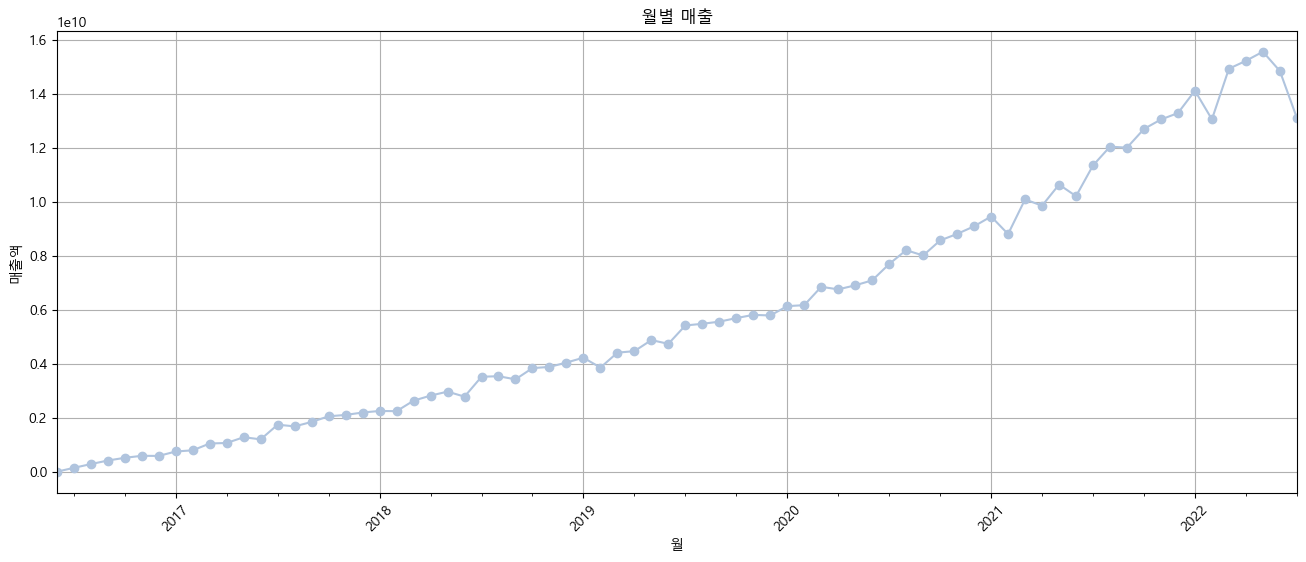

In [8]:
period_sales = df.groupby('transaction_month')['price'].sum()

plt.figure(figsize=(16, 6))
plt.rcParams['font.family'] = 'Malgun Gothic'

period_sales.plot(marker='o', color='lightsteelblue')

plt.xlabel('월')
plt.ylabel('매출액')
plt.title('월별 매출')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [9]:
# 6, 7월에 하락
# 다른 그래프는 7월에 상승
# 2022년에는 왜 떨어졌을지,,

In [10]:
cu['first_join_month'] = pd.to_datetime(cu['first_join_date']).dt.to_period('M')
cu.head()

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date,first_join_month,churn
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,1996-06-14,2019-07-21,2019-07,not_purchased
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,1993-08-16,2017-07-16,2017-07,not_purchased
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,1989-01-23,2020-08-23,2020-08,F
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,1991-01-05,2021-10-03,2021-10,not_purchased
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,2000-07-15,2021-04-11,2021-04,T


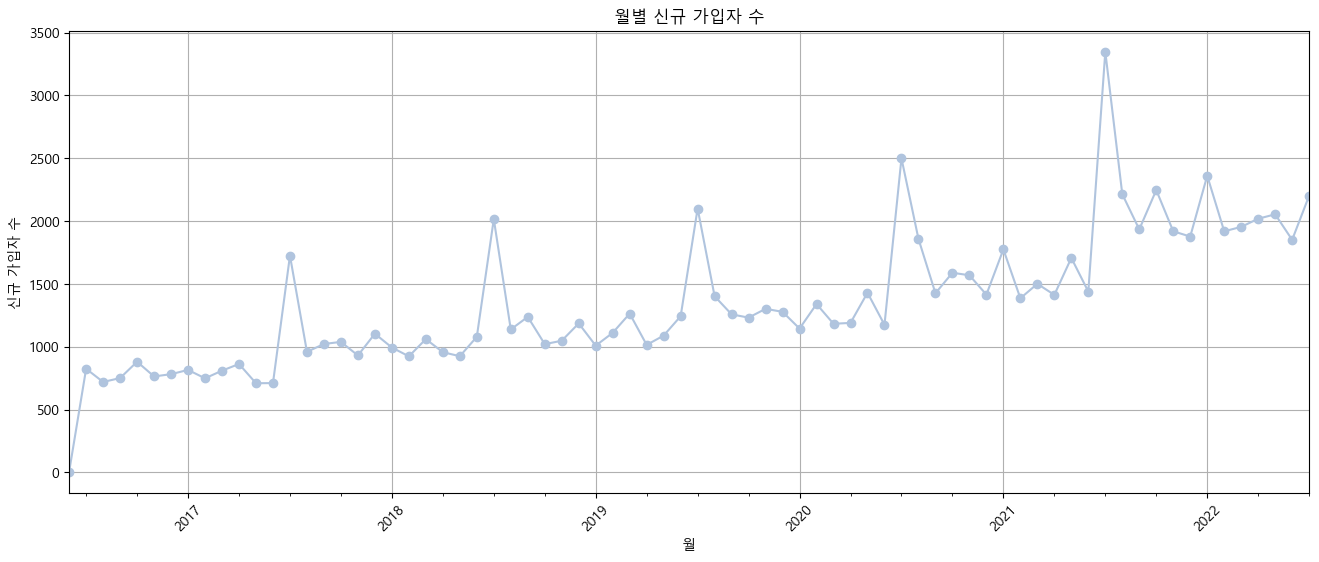

In [11]:
period_new_customer = cu.groupby('first_join_month')['customer_id'].count()

plt.figure(figsize=(16, 6))
plt.rcParams['font.family'] = 'Malgun Gothic'

period_new_customer.plot(marker='o', color='lightsteelblue')

plt.xlabel('월')
plt.ylabel('신규 가입자 수')
plt.title('월별 신규 가입자 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [12]:
# 2022년 7월 신규고객수가 대폭 감소 → 매출에 영향을 미친 것으로 판단

In [13]:
tr.shape

(1201034, 13)

In [14]:
df = pd.merge(tr, cu[['customer_id', 'first_join_date', 'first_join_month']], on='customer_id', how='inner')
df

,created_at,customer_id,payment_method,promo_amount,promo_code,shipment_lat,shipment_long,product_id,year,customer_lat,customer_long,price,transaction_month,first_join_date,first_join_month
0,2018-07-29 15:22:01.458193+00:00,5868,Debit Card,1415,WEEKENDSERU,-8.227893,111.969107,44660,2018,-6.122897,106.876500,191247,2018-07,2018-07-28,2018-07
1,2018-07-30 12:40:22.365620+00:00,4774,Credit Card,0,Not Promoted,3.013470,107.802514,16193,2018,-3.602334,120.363824,145526,2018-07,2018-07-28,2018-07
2,2018-09-15 11:51:17.365620+00:00,4774,OVO,0,Not Promoted,-2.579428,115.743885,53686,2018,-3.602334,120.363824,540696,2018-09,2018-07-28,2018-07
3,2018-11-01 11:23:48.365620+00:00,4774,Credit Card,0,Not Promoted,-3.602334,120.363824,20228,2018,-3.602334,120.363824,271012,2018-11,2018-07-28,2018-07
4,2018-12-18 11:20:30.365620+00:00,4774,Credit Card,0,Not Promoted,-3.602334,120.363824,55220,2018,-3.602334,120.363824,198753,2018-12,2018-07-28,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201029,2020-11-12 18:19:20.074873+00:00,25121,Debit Card,0,Not Promoted,-6.286732,106.902229,42899,2020,-6.869535,111.077145,277688,2020-11,2020-11-12,2020-11
1201030,2021-12-09 07:35:18.222046+00:00,34829,OVO,5010,AZ2022,-8.677264,115.176947,19394,2021,-2.266407,120.415779,354213,2021-12,2021-12-08,2021-12
1201031,2021-12-11 01:20:36.944593+00:00,99645,Credit Card,2181,WEEKENDSERU,-6.185498,106.831093,24250,2021,-6.185498,106.831093,1155340,2021-12,2021-12-08,2021-12
1201032,2019-12-18 11:01:09.623382+00:00,87319,Credit Card,4503,AZ2022,-7.155977,110.891858,11312,2019,-7.155977,110.891858,188646,2019-12,2019-12-18,2019-12


In [15]:
df['transaction_date'] = pd.to_datetime(df['created_at']).dt.strftime('%Y-%m-%d')
df

,created_at,customer_id,payment_method,promo_amount,promo_code,shipment_lat,shipment_long,product_id,year,customer_lat,customer_long,price,transaction_month,first_join_date,first_join_month,transaction_date
0,2018-07-29 15:22:01.458193+00:00,5868,Debit Card,1415,WEEKENDSERU,-8.227893,111.969107,44660,2018,-6.122897,106.876500,191247,2018-07,2018-07-28,2018-07,2018-07-29
1,2018-07-30 12:40:22.365620+00:00,4774,Credit Card,0,Not Promoted,3.013470,107.802514,16193,2018,-3.602334,120.363824,145526,2018-07,2018-07-28,2018-07,2018-07-30
2,2018-09-15 11:51:17.365620+00:00,4774,OVO,0,Not Promoted,-2.579428,115.743885,53686,2018,-3.602334,120.363824,540696,2018-09,2018-07-28,2018-07,2018-09-15
3,2018-11-01 11:23:48.365620+00:00,4774,Credit Card,0,Not Promoted,-3.602334,120.363824,20228,2018,-3.602334,120.363824,271012,2018-11,2018-07-28,2018-07,2018-11-01
4,2018-12-18 11:20:30.365620+00:00,4774,Credit Card,0,Not Promoted,-3.602334,120.363824,55220,2018,-3.602334,120.363824,198753,2018-12,2018-07-28,2018-07,2018-12-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201029,2020-11-12 18:19:20.074873+00:00,25121,Debit Card,0,Not Promoted,-6.286732,106.902229,42899,2020,-6.869535,111.077145,277688,2020-11,2020-11-12,2020-11,2020-11-12
1201030,2021-12-09 07:35:18.222046+00:00,34829,OVO,5010,AZ2022,-8.677264,115.176947,19394,2021,-2.266407,120.415779,354213,2021-12,2021-12-08,2021-12,2021-12-09
1201031,2021-12-11 01:20:36.944593+00:00,99645,Credit Card,2181,WEEKENDSERU,-6.185498,106.831093,24250,2021,-6.185498,106.831093,1155340,2021-12,2021-12-08,2021-12,2021-12-11
1201032,2019-12-18 11:01:09.623382+00:00,87319,Credit Card,4503,AZ2022,-7.155977,110.891858,11312,2019,-7.155977,110.891858,188646,2019-12,2019-12-18,2019-12,2019-12-18


# 신규 고객/ 기존 고객 나누는 부분

In [16]:
def categorize_customer(row):
    time_difference = row['transaction_date'] - row['first_join_date']
    if time_difference.days <= 30:
        return '신규고객'
    else:
        return '기존고객'

df['first_join_date'] = pd.to_datetime(df['first_join_date'])
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['customer_category'] = df.apply(categorize_customer, axis=1)
df

,created_at,customer_id,payment_method,promo_amount,promo_code,shipment_lat,shipment_long,product_id,year,customer_lat,customer_long,price,transaction_month,first_join_date,first_join_month,transaction_date,customer_category
0,2018-07-29 15:22:01.458193+00:00,5868,Debit Card,1415,WEEKENDSERU,-8.227893,111.969107,44660,2018,-6.122897,106.876500,191247,2018-07,2018-07-28,2018-07,2018-07-29,신규고객
1,2018-07-30 12:40:22.365620+00:00,4774,Credit Card,0,Not Promoted,3.013470,107.802514,16193,2018,-3.602334,120.363824,145526,2018-07,2018-07-28,2018-07,2018-07-30,신규고객
2,2018-09-15 11:51:17.365620+00:00,4774,OVO,0,Not Promoted,-2.579428,115.743885,53686,2018,-3.602334,120.363824,540696,2018-09,2018-07-28,2018-07,2018-09-15,기존고객
3,2018-11-01 11:23:48.365620+00:00,4774,Credit Card,0,Not Promoted,-3.602334,120.363824,20228,2018,-3.602334,120.363824,271012,2018-11,2018-07-28,2018-07,2018-11-01,기존고객
4,2018-12-18 11:20:30.365620+00:00,4774,Credit Card,0,Not Promoted,-3.602334,120.363824,55220,2018,-3.602334,120.363824,198753,2018-12,2018-07-28,2018-07,2018-12-18,기존고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201029,2020-11-12 18:19:20.074873+00:00,25121,Debit Card,0,Not Promoted,-6.286732,106.902229,42899,2020,-6.869535,111.077145,277688,2020-11,2020-11-12,2020-11,2020-11-12,신규고객
1201030,2021-12-09 07:35:18.222046+00:00,34829,OVO,5010,AZ2022,-8.677264,115.176947,19394,2021,-2.266407,120.415779,354213,2021-12,2021-12-08,2021-12,2021-12-09,신규고객
1201031,2021-12-11 01:20:36.944593+00:00,99645,Credit Card,2181,WEEKENDSERU,-6.185498,106.831093,24250,2021,-6.185498,106.831093,1155340,2021-12,2021-12-08,2021-12,2021-12-11,신규고객
1201032,2019-12-18 11:01:09.623382+00:00,87319,Credit Card,4503,AZ2022,-7.155977,110.891858,11312,2019,-7.155977,110.891858,188646,2019-12,2019-12-18,2019-12,2019-12-18,신규고객


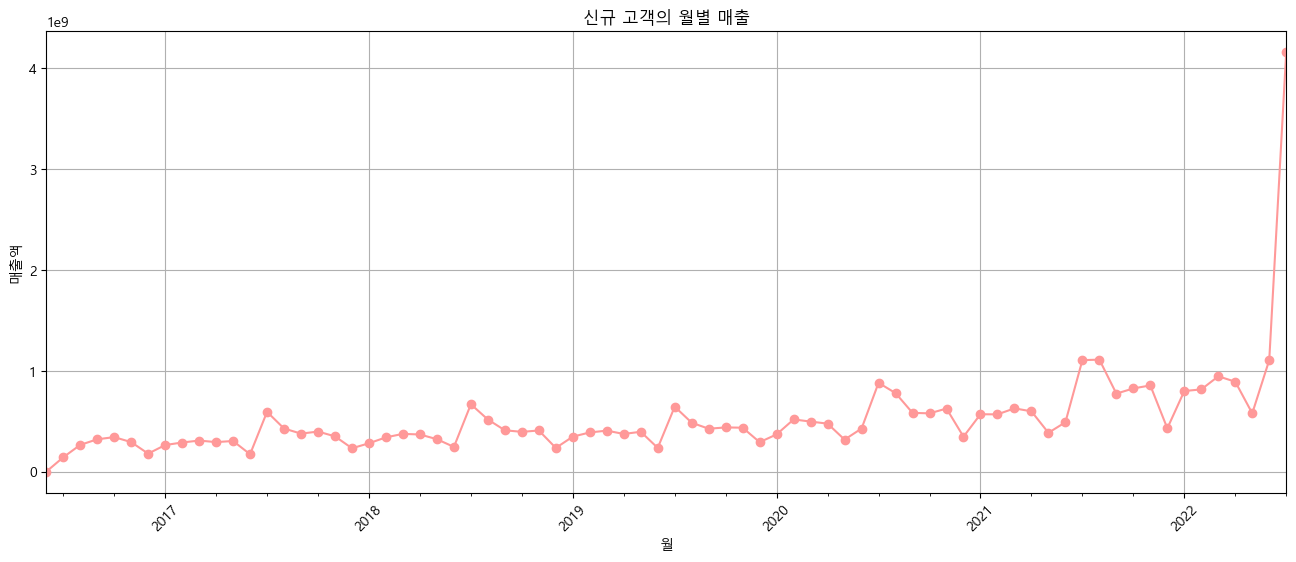

In [17]:
# 데이터
new_customer = df.query('customer_category == "신규고객"')
existing_customer = df.query('customer_category == "기존고객"')

price_total_customer = df.groupby('transaction_month')['price'].sum()
price_new_customer = new_customer.groupby('transaction_month')['price'].sum()
price_existing_customer = existing_customer.groupby('transaction_month')['price'].sum()

# 시각화
plt.figure(figsize=(16, 6))
price_new_customer.plot(marker='o', color='#ff9999')

plt.xlabel('월')
plt.ylabel('매출액')
plt.title('신규 고객의 월별 매출')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [18]:
# 신규고객은 감소했지만, 매출은 대폭 상승

# why? 이상치?

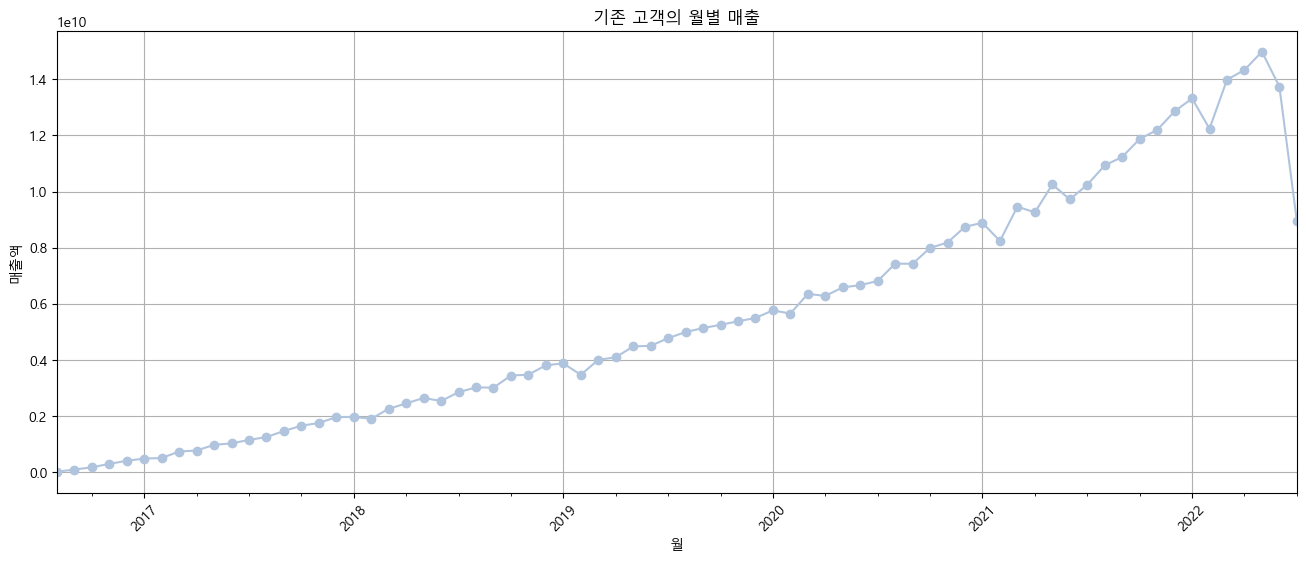

In [19]:
plt.figure(figsize=(16, 6))
price_existing_customer.plot(marker='o', color='lightsteelblue')

plt.xlabel('월')
plt.ylabel('매출액')
plt.title('기존 고객의 월별 매출')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

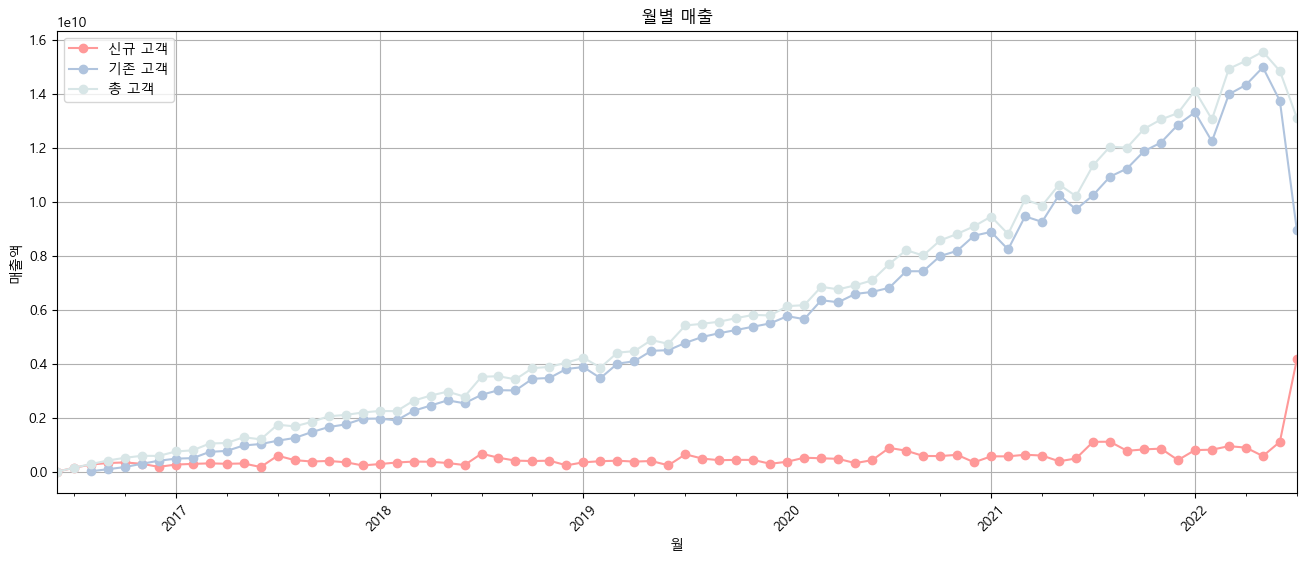

In [23]:
plt.figure(figsize=(16, 6))
price_new_customer.plot(marker='o', color='#ff9999', label='신규 고객')
price_existing_customer.plot(marker='o', color='lightsteelblue', label='기존 고객')
price_total_customer.plot(marker='o', color='#D8E6E7', label='총 고객')

plt.xlabel('월')
plt.ylabel('매출액')
plt.title('월별 매출')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [25]:
# 신규고객의 매출은 증가했지만, 기존고객의 소비량이 대폭 하락

# 가설) 신규 회원을 대상으로 프로모션을 진행했음

### 가설) 신규 회원을 대상으로 프로모션을 진행

In [24]:
# 각 고객의 평균 소비 금액 계산
avg_spending_per_customer = tr.groupby(['promo_code', 'customer_id'])['total_amount'].mean().reset_index()

# 프로모션 코드별 1인당 평균 소비 금액 계산
avg_spending_per_promo = avg_spending_per_customer.groupby('promo_code')['total_amount'].mean().reset_index()

# 스타일 설정
sns.set_style("whitegrid")

# 그래프 그리기
plt.figure(figsize=(14, 6))
sns.barplot(data=avg_spending_per_promo, x='promo_code', y='total_amount', palette="viridis")

# 제목 및 라벨 설정
plt.title('Per Capita Average Customer Spending by Promo Code')
plt.xlabel('Promotion Code')
plt.ylabel('Per Capita Average Spending')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()


KeyError: 'Column not found: total_amount'

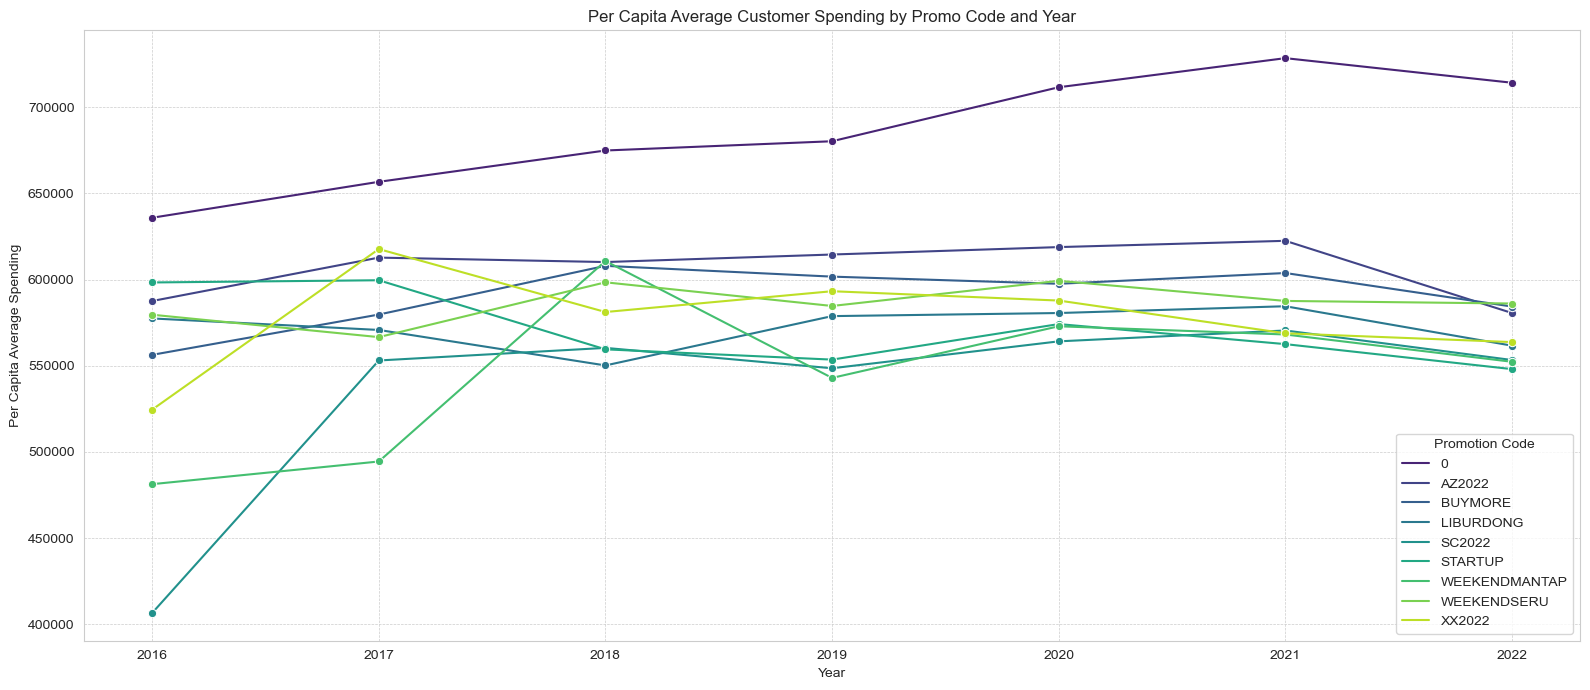

In [ ]:
# 데이터셋에 'year' 열이 있는지 확인하고, 없다면 'date' 열(또는 비슷한 이름의 열)에서 년도를 추출해야 합니다.
# 여기서는 'year' 열이 이미 있다고 가정합니다.

# 각 고객의 년별 평균 소비 금액 계산
avg_spending_per_customer_yearly = tr.groupby(['year', 'promo_code', 'customer_id'])['total_amount'].mean().reset_index()

# 년도와 프로모션 코드별 1인당 평균 소비 금액 계산
avg_spending_per_promo_yearly = avg_spending_per_customer_yearly.groupby(['year', 'promo_code'])['total_amount'].mean().reset_index()

# 스타일 설정
sns.set_style("whitegrid")

# 그래프 그리기
plt.figure(figsize=(16, 7))
sns.lineplot(data=avg_spending_per_promo_yearly, x='year', y='total_amount', hue='promo_code', marker='o', palette="viridis")

# 제목 및 라벨 설정
plt.title('Per Capita Average Customer Spending by Promo Code and Year')
plt.xlabel('Year')
plt.ylabel('Per Capita Average Spending')
plt.legend(title='Promotion Code')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# 그래프 표시
plt.show()


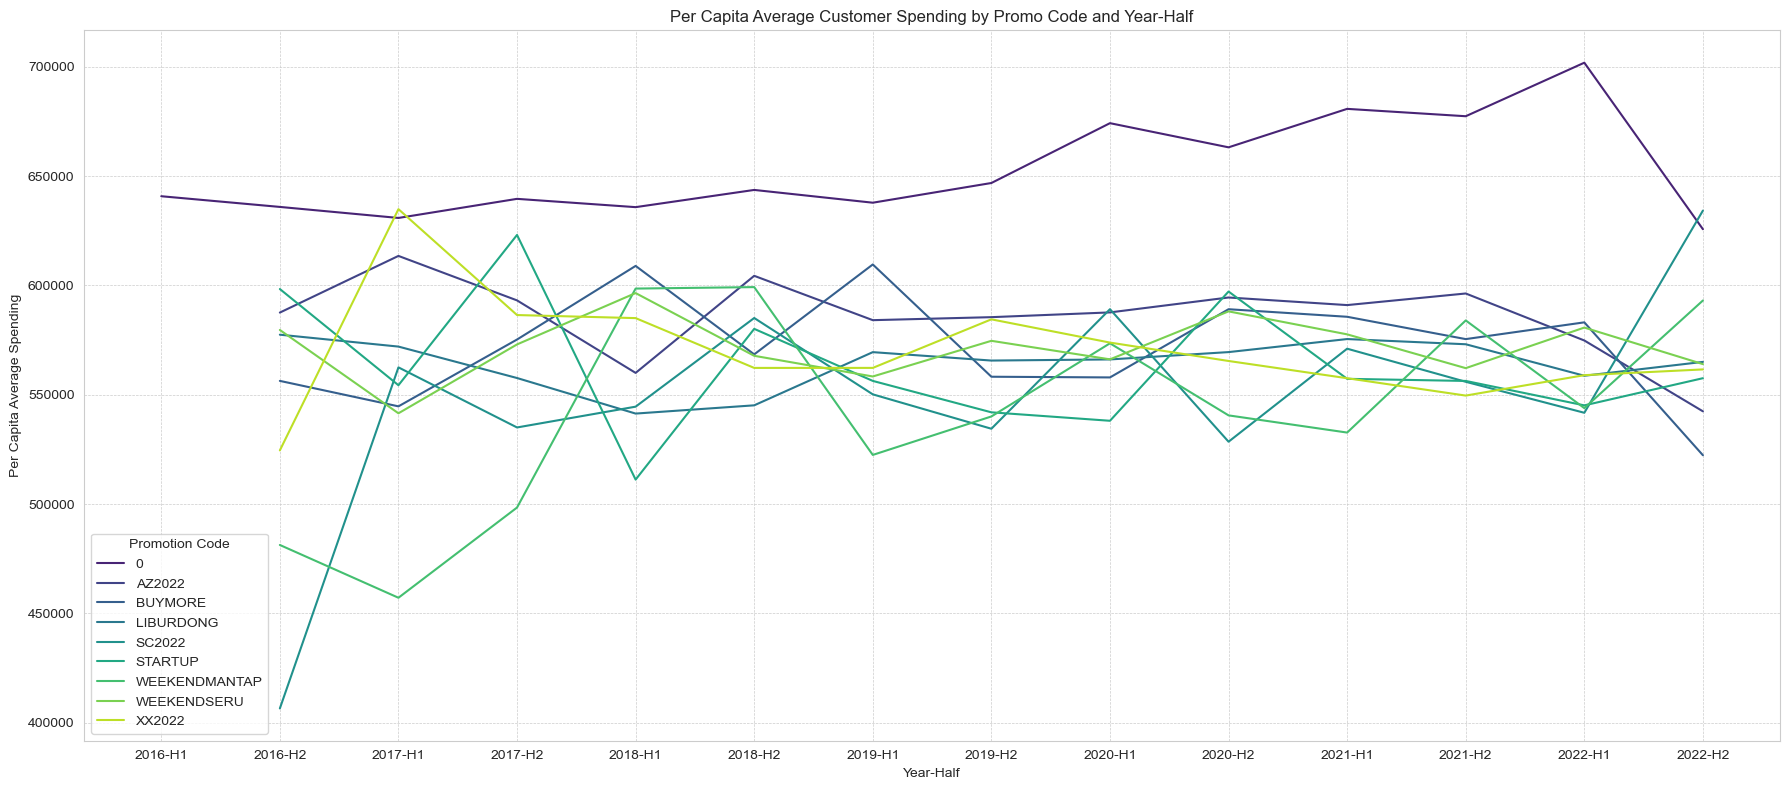

In [ ]:
# 데이터셋에 'month' 열이 있는지 확인하고, 없다면 'date' 열에서 월을 추출해야 합니다.
# 여기서는 'month' 열이 이미 있다고 가정합니다.

# 상반기/하반기 판별 함수
def half_of_year(month):
    return 'H1' if month <= 6 else 'H2'

# 상반기/하반기 정보 추가
tr['half_year'] = tr['month'].apply(half_of_year)

# 각 고객의 연도 및 상/하반기별 평균 소비 금액 계산
avg_spending_per_customer_half_yearly = tr.groupby(['year', 'half_year', 'promo_code', 'customer_id'])['total_amount'].mean().reset_index()

# 연도, 상/하반기, 프로모션 코드별 1인당 평균 소비 금액 계산
avg_spending_per_promo_half_yearly = avg_spending_per_customer_half_yearly.groupby(['year', 'half_year', 'promo_code'])['total_amount'].mean().reset_index()

# 연도-상반기/하반기 형식으로 열을 조합
avg_spending_per_promo_half_yearly['year_half'] = avg_spending_per_promo_half_yearly['year'].astype(str) + "-" + avg_spending_per_promo_half_yearly['half_year']

# 스타일 설정
sns.set_style("whitegrid")

# 그래프 그리기
plt.figure(figsize=(18, 8))
sns.lineplot(data=avg_spending_per_promo_half_yearly, x='year_half', y='total_amount', hue='promo_code', markers=True, dashes=False, palette="viridis")

# 제목 및 라벨 설정
plt.title('Per Capita Average Customer Spending by Promo Code and Year-Half')
plt.xlabel('Year-Half')
plt.ylabel('Per Capita Average Spending')
plt.legend(title='Promotion Code')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# 그래프 표시
plt.show()


# 프로모션 유무에 따른 객단가

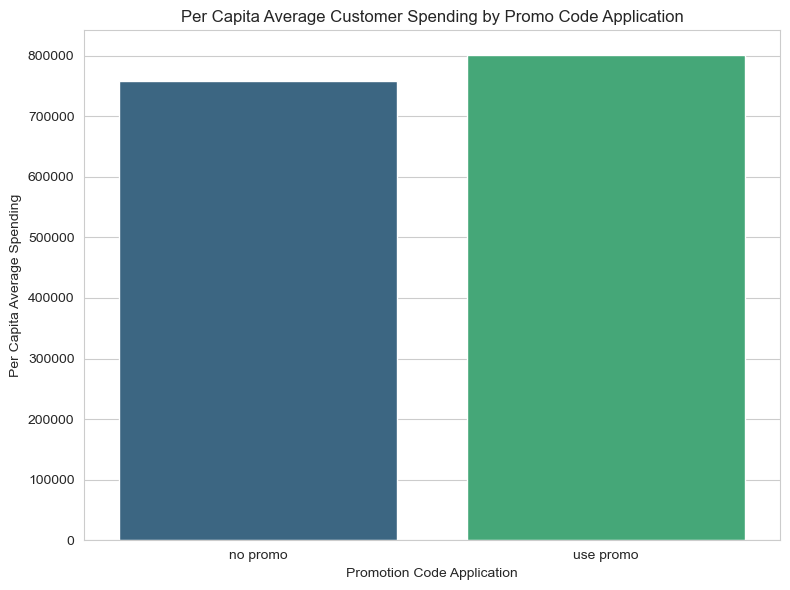

In [ ]:
# 프로모션 코드 적용 여부 판별 함수
def promo_applied(promo_code):
    return 'use promo' if promo_code == 0 else 'no promo'

# 프로모션 코드 적용 여부 칼럼 추가
tr['promo_status'] = tr['promo_code'].apply(promo_applied)

# 각 고객의 프로모션 코드 적용 여부별 평균 소비 금액 계산
avg_spending_per_customer_by_promo = tr.groupby(['promo_status', 'customer_id'])['total_amount'].mean().reset_index()

# 프로모션 코드 적용 여부별 1인당 평균 소비 금액 계산
avg_spending_by_promo = avg_spending_per_customer_by_promo.groupby('promo_status')['total_amount'].mean().reset_index()

# 스타일 설정
sns.set_style("whitegrid")

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_spending_by_promo, x='promo_status', y='total_amount', palette="viridis")

# 제목 및 라벨 설정
plt.title('Per Capita Average Customer Spending by Promo Code Application')
plt.xlabel('Promotion Code Application')
plt.ylabel('Per Capita Average Spending')
plt.tight_layout()

# 그래프 표시
plt.show()


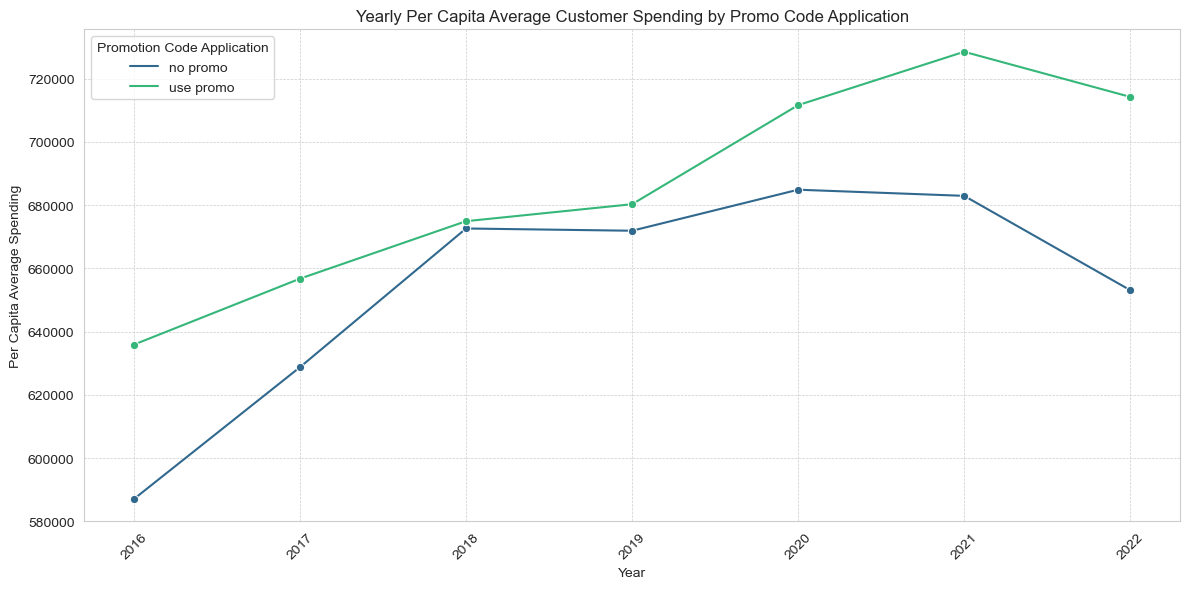

In [ ]:
# 각 고객의 연도별, 프로모션 코드 적용 여부별 평균 소비 금액 계산
avg_spending_per_customer_by_year_promo = tr.groupby(['year', 'promo_status', 'customer_id'])['total_amount'].mean().reset_index()

# 연도별, 프로모션 코드 적용 여부별 1인당 평균 소비 금액 계산
avg_spending_by_year_promo = avg_spending_per_customer_by_year_promo.groupby(['year', 'promo_status'])['total_amount'].mean().reset_index()

# 스타일 설정
sns.set_style("whitegrid")

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_spending_by_year_promo, x='year', y='total_amount', hue='promo_status', marker='o', palette="viridis")

# 제목 및 라벨 설정
plt.title('Yearly Per Capita Average Customer Spending by Promo Code Application')
plt.xlabel('Year')
plt.ylabel('Per Capita Average Spending')
plt.legend(title='Promotion Code Application')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()


In [ ]:
# 데이터프레임 예시입니다. 실제 데이터프레임의 이름과 컬럼을 참고하여 수정해야 합니다.
tr['year'] = pd.to_datetime(tr['created_at']).dt.year
tr['month'] = pd.to_datetime(tr['created_at']).dt.month
tr['half'] = tr['month'].apply(lambda x: 'H1' if x <= 6 else 'H2')

# 연도와 상반기/하반기, 그리고 프로모션 코드의 사용 여부로 그룹화하여 평균 소비 금액을 계산합니다.
avg_spending_by_half_year_promo = tr.groupby(['year', 'half', 'promo_status'])['total_amount'].mean().reset_index()

# 연도와 상반기/하반기를 합쳐서 새로운 컬럼을 생성합니다.
avg_spending_by_half_year_promo['year_half'] = avg_spending_by_half_year_promo['year'].astype(str) + '-' + avg_spending_by_half_year_promo['half']


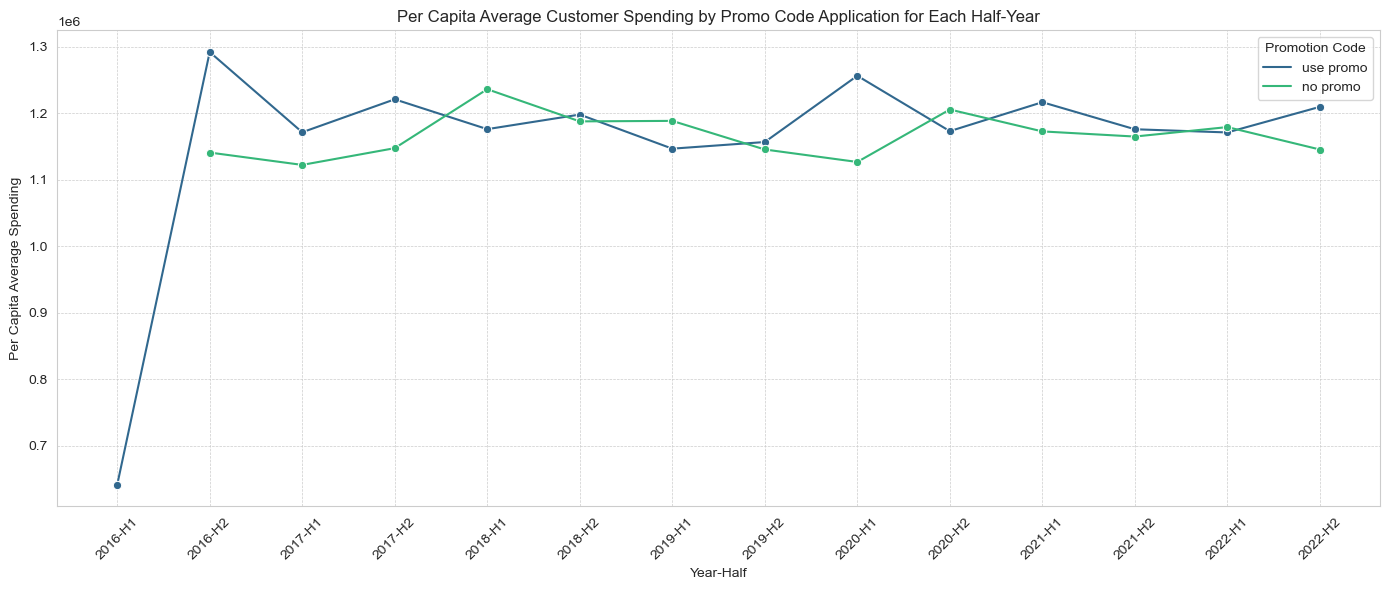

In [ ]:
# 연도와 상반기/하반기를 합친 새로운 열 생성
avg_spending_by_half_year_promo['year_half'] = avg_spending_by_half_year_promo['year'].astype(str) + '-' + avg_spending_by_half_year_promo['half']

# 스타일 설정
sns.set_style("whitegrid")

# 그래프 그리기
plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_spending_by_half_year_promo, x='year_half', y='total_amount', hue='promo_status', marker='o', dashes=False, palette="viridis")

# 제목 및 라벨 설정
plt.title('Per Capita Average Customer Spending by Promo Code Application for Each Half-Year')
plt.xlabel('Year-Half')
plt.ylabel('Per Capita Average Spending')
plt.legend(title='Promotion Code')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()


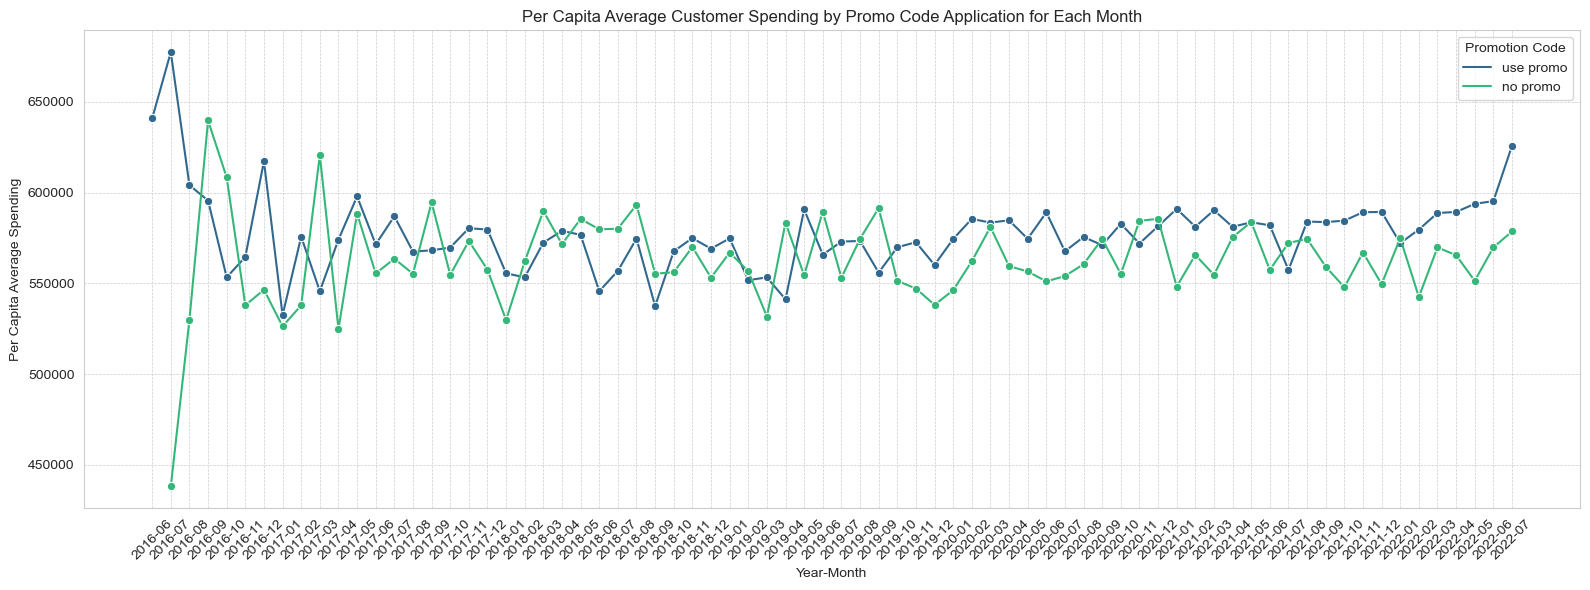

In [ ]:
# 연도와 월을 합쳐서 새로운 'year_month' 열 생성
tr['year_month'] = tr['year'].astype(str) + '-' + tr['month'].apply(lambda x: f"{x:02d}")

# 연도와 월 별로, 프로모션 코드의 적용 여부에 따른 각 고객의 평균 소비 금액 계산
avg_spending_per_customer_by_month_promo = tr.groupby(['year_month', 'promo_status', 'customer_id'])['total_amount'].mean().reset_index()

# 연도와 월 별로, 프로모션 코드의 적용 여부에 따른 1인당 평균 소비 금액 계산
avg_spending_by_month_promo = avg_spending_per_customer_by_month_promo.groupby(['year_month', 'promo_status'])['total_amount'].mean().reset_index()

# 스타일 설정
sns.set_style("whitegrid")

# 그래프 그리기
plt.figure(figsize=(16, 6))
sns.lineplot(data=avg_spending_by_month_promo, x='year_month', y='total_amount', hue='promo_status', marker='o', dashes=False, palette="viridis")

# 제목 및 라벨 설정
plt.title('Per Capita Average Customer Spending by Promo Code Application for Each Month')
plt.xlabel('Year-Month')
plt.ylabel('Per Capita Average Spending')
plt.legend(title='Promotion Code')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()


In [22]:
# 데이터
new_customer = df.query('customer_category == "신규고객"')
existing_customer = df.query('customer_category == "기존고객"')

df['transaction_month'] = df['transaction_month'].astype('str')
month_list = np.sort(df['transaction_month'].unique().tolist())

new_customer_yespromo_list = [len(new_customer.query(f'transaction_month == "{i}" and promo_code != "Not Promoted"')['created_at'].unique()) for i in month_list]
new_customer_notpromo_list = [len(new_customer.query(f'transaction_month == "{i}" and promo_code == "Not Promoted"')['created_at'].unique()) for i in month_list]
existing_customer_yespromo_list = [len(existing_customer.query(f'transaction_month == "{i}" and promo_code != "Not Promoted"')['created_at'].unique()) for i in month_list]
existing_customer_notpromo_list = [len(existing_customer.query(f'transaction_month == "{i}" and promo_code == "Not Promoted"')['created_at'].unique()) for i in month_list]

KeyboardInterrupt: 

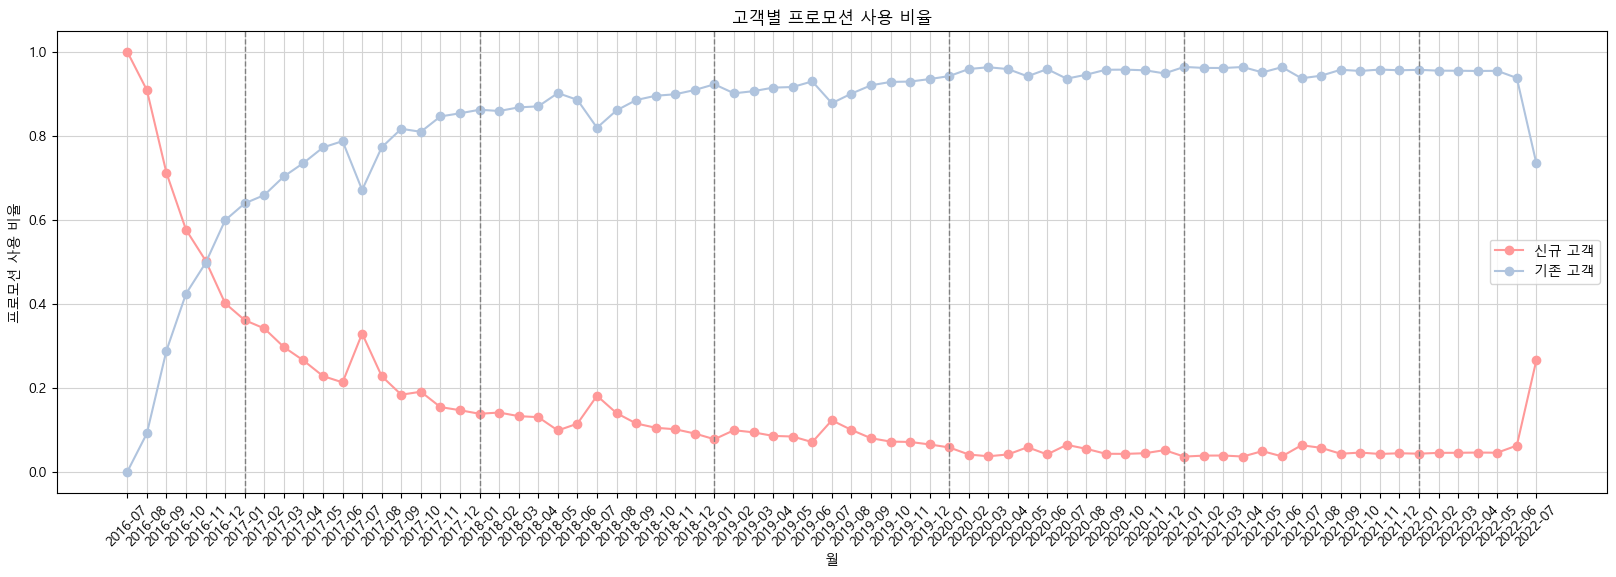

In [ ]:
# 프로모션 사용 비율 (신규 vs 기존)
new_customer_promo_ratio = [new_customer_yespromo_list[i] / (new_customer_yespromo_list[i] + existing_customer_yespromo_list[i]) for i in range(len(month_list))]
existing_customer_promo_ratio = [existing_customer_yespromo_list[i] / (new_customer_yespromo_list[i] + existing_customer_yespromo_list[i]) for i in range(len(month_list))]

# 시각화
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(month_list, new_customer_promo_ratio, color='#ff9999', marker='o', label='신규 고객')
ax.plot(month_list, existing_customer_promo_ratio, color='lightsteelblue', marker='o', label='기존 고객')

# 1월마다 수직선 그리기
for month in month_list:
    if month.endswith('-01'):
        ax.axvline(x=month, color='gray', linestyle='--', linewidth=1)

plt.xlabel('월')
plt.ylabel('프로모션 사용 비율')
plt.title('고객별 프로모션 사용 비율')
plt.grid(True, color='lightgray')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
# 가설에 합당한 그래프를 보임

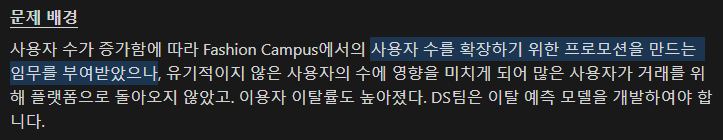

In [ ]:
# 문제 배경에도 제시됨 → 가설 입증

# 문제) 매출이 감소한 것으로 보아 신규 고객을 위한 프로모션이 실패한 것으로 판단

### 신규 고객을 위한 프로모션이 실패한 이유 분석

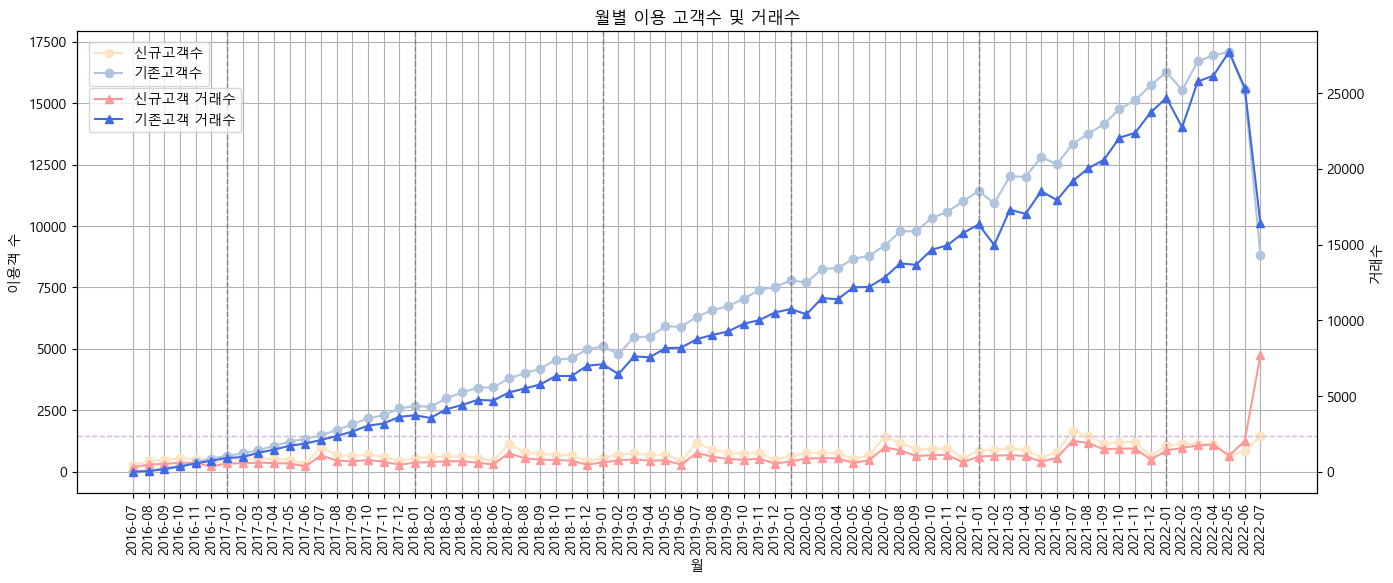

In [ ]:
# 데이터
unique_new_customers_list = [len(new_customer.query(f'transaction_month == "{i}"')['customer_id'].unique()) for i in month_list]
unique_existing_customers_list = [len(existing_customer.query(f'transaction_month == "{i}"')['customer_id'].unique()) for i in month_list]

new_customer_transaction_count = [len(new_customer.query(f'transaction_month == "{i}"')['created_at'].unique()) for i in month_list]
existing_customer_transaction_count = [len(existing_customer.query(f'transaction_month == "{i}"')['created_at'].unique()) for i in month_list]

# 고객수 라인그래프
fig,ax = plt.subplots(figsize=(16,6))
plt.rcParams['font.family'] = 'Malgun Gothic'

ax.plot(month_list, unique_new_customers_list, marker='o', color='bisque', label='신규고객수')
ax.plot(month_list, unique_existing_customers_list, marker='o', color='lightsteelblue', label='기존고객수')

# 거래수 라인그래프
ax2 = ax.twinx()  # ax와 x축을 공유하는 새로운 y축 생성
ax2.plot(month_list, new_customer_transaction_count, marker='^', color='#ff9999', linestyle='-', label='신규고객 거래수')
ax2.plot(month_list, existing_customer_transaction_count, marker='^', color='royalblue', linestyle='-', label='기존고객 거래수')

ax2.set_ylabel('거래수')

# 1월마다 수직선 그리기
for month in month_list:
    if month.endswith('-01'):
        ax.axvline(x=month, color='gray', linestyle='--', linewidth=1)
ax.axhline(y=1450, color='#d3b7d8', linestyle='--', linewidth=1)

ax.set_xlabel('월')
ax.set_ylabel('이용객 수')
ax.set_title('월별 이용 고객수 및 거래수')
ax.legend(loc=(0.01,0.88)) 
ax2.legend(loc=(0.01,0.78))  
ax.set_xticklabels(month_list, rotation=90) 
ax.grid(True)
plt.show()

In [ ]:
print(len(new_customer.query('transaction_month == "2022-06"')['created_at'].unique()))
print(len(new_customer.query('transaction_month == "2022-07"')['created_at'].unique()))

2034
7696


In [ ]:
print(len(new_customer.query('promo_code != "Not Promoted" and transaction_month == "2022-06"')['created_at'].unique()))
print(len(new_customer.query('promo_code != "Not Promoted" and transaction_month == "2022-07"')['created_at'].unique()))

532
1788


In [ ]:
# 위의 그래프와 같이 신규고객의 수는 일정한 반면, 기존고객의 경우 이용률이 대폭 감소하는 것을 확인 가능 (기존 고객의 이탈 발생)

# 신규고객의 수는 일정한 반면, 신규고객의 거래 수는 대폭 증가하는 것을 확인 가능 (여러 번 구매해야 하는 프로모션일 것으로 추정)

In [ ]:
# 마케팅 대상에 대해서는 성공했지만, 전체적으로 매출은 감소하였음

# 이는 기존고객이 신규고객에 비해 고객수와 매출량에서 큰 부분을 차지했기 때문에, 매출에 긍정적 영향을 끼치지 못한 것으로 판단

# >> 마케팅의 타겟을 바꿔서 기존고객에 대해 매출증대 프로모션을 진행하고, 신규고객은 매출증대가 아닌 유입 프로모션을 진행하면 좋을 것으로 생각됨
# BUT 기존고객 수가 많기 때문에 오히려 매출에 악영향을 끼칠 수 있음 (신규고객의 경우 300%의 거래량 달성 → 기존고객에 대해 프로모션 진행 시, 매출에 큰 영향을 줄 것)

In [ ]:
# 기존 고객의 이탈은 매출에 큰 영향을 미침 → 이탈 예측모델을 만들어 이탈요인 파악 및 이탈 방지모델 설계 필요

In [ ]:
# 목표
# 1. 이탈 기준 정의
# 2. 이탈률 측정
# 3. 이탈 예측모델 개발
# 4. 이탈 방지모델 설계
# 5. 매출 상승을 위한 해결 방안 모색 (신규고객 유입 + 기존고객 이탈 방지 마케팅 동시 진행) → '헌 옷을 절약하거나 사고 파는 중고거래'의 패턴 발견 → 사용 가능한 헌 옷을 판매하는 비즈니스 모델을 개발하여 마케팅 진행

#### 기타

In [ ]:
# 가설) 기존고객을 챙기지 않고 신규고객을 챙기는 프로모션에 이탈률이 높아진 것? 7월 joindate 및 age 살펴보기 (어리거나 늙은 나이가 많다면 계정을 새로 판거일수도)

In [ ]:
df.groupby('first_join_month')['buy_age'].mean()

first_join_month
2016-06    36.600000
2016-07    22.399311
2016-08    22.823227
2016-09    23.501242
2016-10    22.357291
             ...    
2022-03    25.853297
2022-04    25.912678
2022-05    25.951959
2022-06    26.192212
2022-07    26.006531
Freq: M, Name: buy_age, Length: 74, dtype: float64

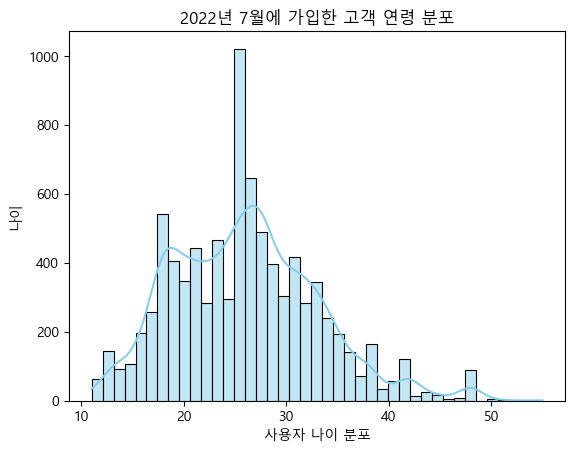

In [ ]:
df['first_join_month'] = df['first_join_month'].astype(str)
test = df.query('first_join_month == "2022-07"')

sns.histplot(data=test, x='buy_age', bins=len(test['buy_age'].unique()), color='skyblue', kde=True)
plt.xlabel('사용자 나이 분포')
plt.ylabel('나이')
plt.title('2022년 7월에 가입한 고객 연령 분포')
plt.show()

In [ ]:
# 가설 기각

#### 기타 시각화

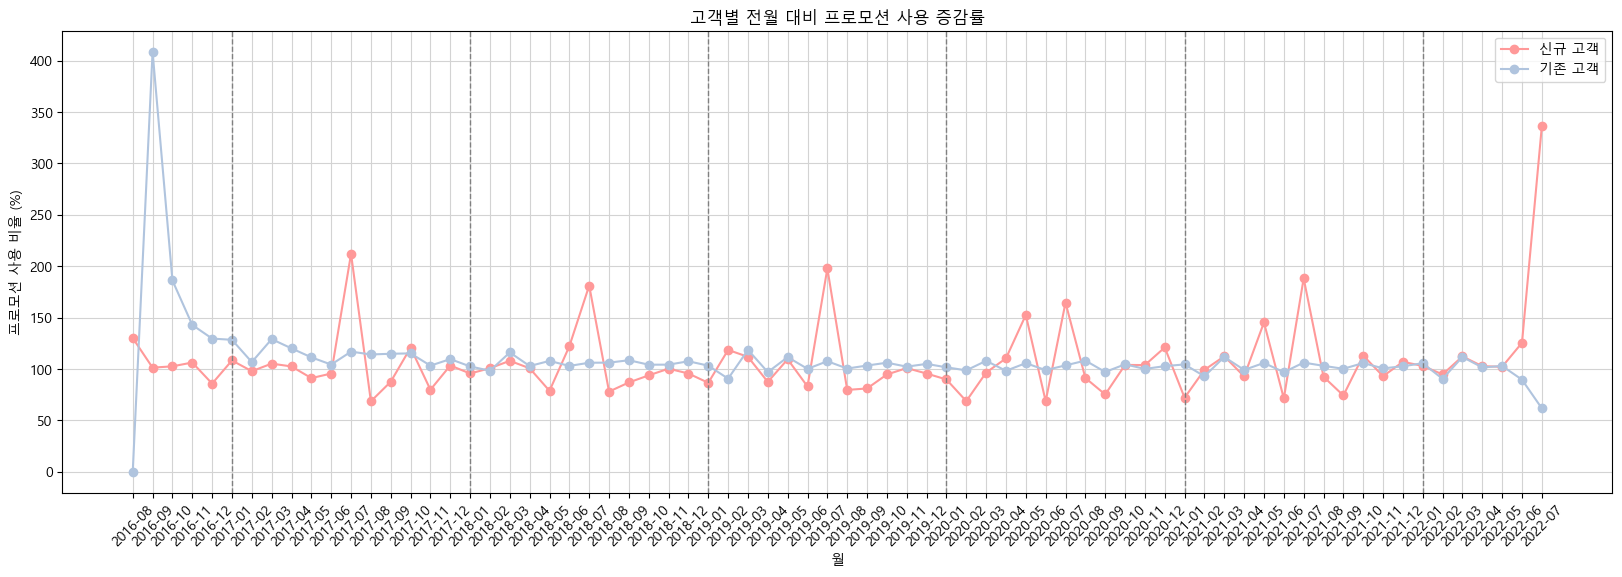

In [ ]:
# 전월 대비 증감률 그래프
month_list2 = month_list[1:]

new_customer_yespromo_month_on_month_rate_change = [(new_customer_yespromo_list[i+1]/new_customer_yespromo_list[i])*100 for i in range(len(new_customer_yespromo_list)-1)]
existing_customer_yespromo_month_on_month_rate_change = [(existing_customer_yespromo_list[i+1]/existing_customer_yespromo_list[i])*100 if existing_customer_yespromo_list[i]!=0 else 0 for i in range(len(existing_customer_yespromo_list)-1)]

# 시각화
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(month_list2, new_customer_yespromo_month_on_month_rate_change, color='#ff9999', marker='o', label='신규 고객')
ax.plot(month_list2, existing_customer_yespromo_month_on_month_rate_change, color='lightsteelblue', marker='o', label='기존 고객')

# 1월마다 수직선 그리기
for month in month_list2:
    if month.endswith('-01'):
        ax.axvline(x=month, color='gray', linestyle='--', linewidth=1)

plt.xlabel('월')
plt.ylabel('프로모션 사용 비율 (%)')
plt.title('고객별 전월 대비 프로모션 사용 증감률')
plt.grid(True, color='lightgray')
plt.xticks(rotation=45)
plt.legend()
plt.show()

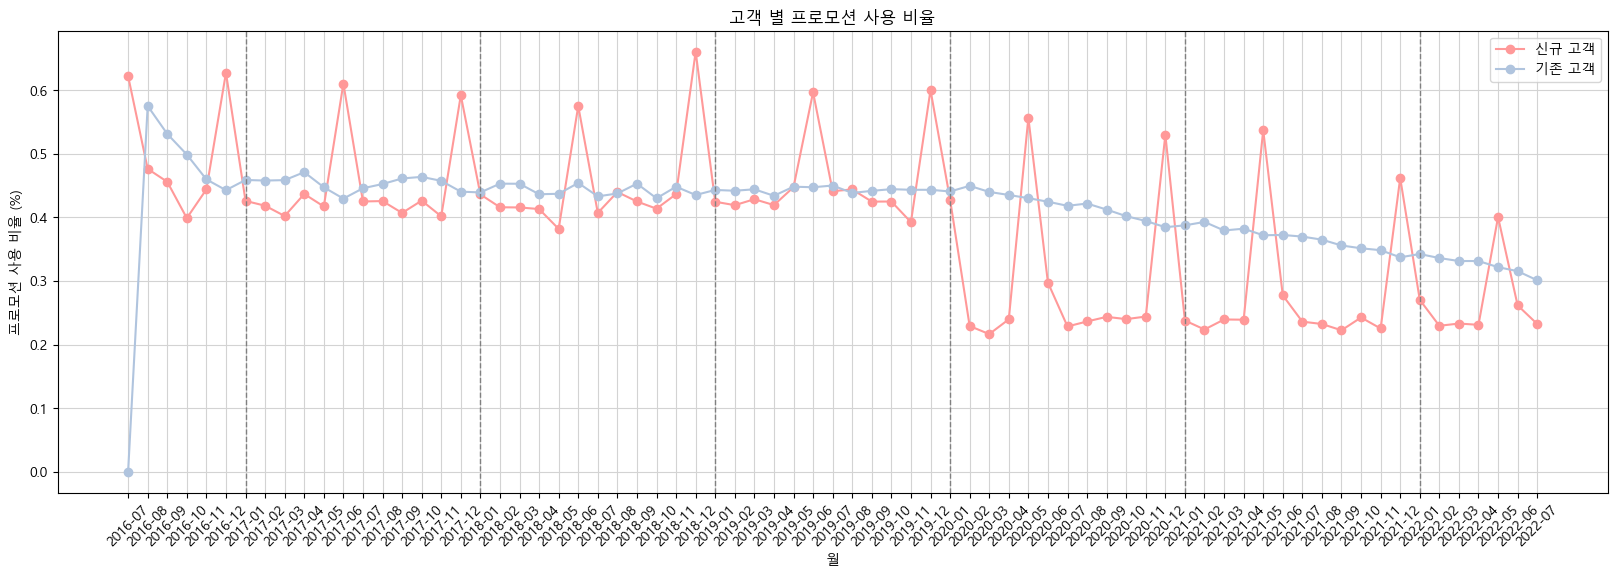

In [ ]:
# 고객별 프로모션 사용 비율 그래프
new_customer_promo_ratio2 = [new_customer_yespromo_list[i] / (new_customer_yespromo_list[i] + new_customer_notpromo_list[i]) for i in range(len(month_list))]
existing_customer_promo_ratio2 = [existing_customer_yespromo_list[i] / (existing_customer_yespromo_list[i] + existing_customer_notpromo_list[i]) if (existing_customer_yespromo_list[i] + existing_customer_notpromo_list[i]) != 0 else 0 for i in range(len(month_list))]

# 시각화
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(month_list, new_customer_promo_ratio2, color='#ff9999', marker='o', label='신규 고객')
ax.plot(month_list, existing_customer_promo_ratio2, color='lightsteelblue', marker='o', label='기존 고객')

# 1월마다 수직선 그리기
for month in month_list2:
    if month.endswith('-01'):
        ax.axvline(x=month, color='gray', linestyle='--', linewidth=1)

plt.xlabel('월')
plt.ylabel('프로모션 사용 비율 (%)')
plt.title('고객 별 프로모션 사용 비율')
plt.grid(True, color='lightgray')
plt.xticks(rotation=45)
plt.legend()
plt.show()

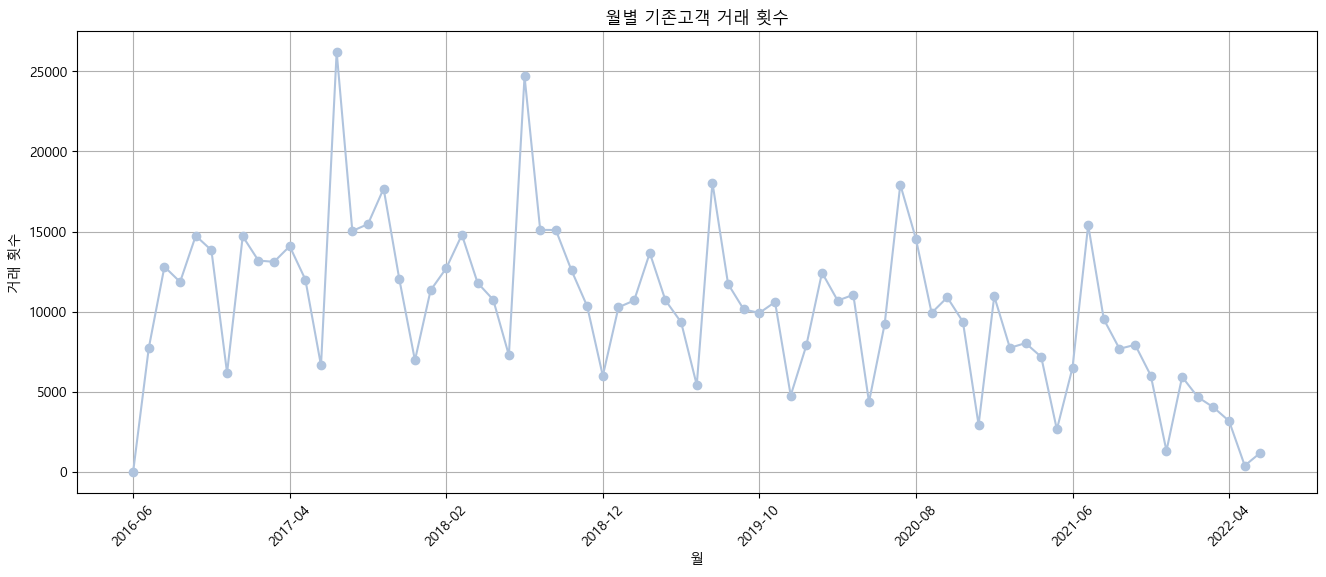

In [ ]:
# df_del = df.drop_duplicates(['created_at']).sort_values(by='created_at').reset_index(drop=True)
# existing_customer = df_del.query('customer_category == "기존고객"')
# data = existing_customer.groupby('first_join_month')['customer_id'].count()

# plt.figure(figsize=(16, 6))
# plt.rcParams['font.family'] = 'Malgun Gothic'

# data.plot(marker='o', color='lightsteelblue')

# plt.xlabel('월')
# plt.ylabel('거래 횟수')
# plt.title('월별 기존고객 거래 횟수')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()

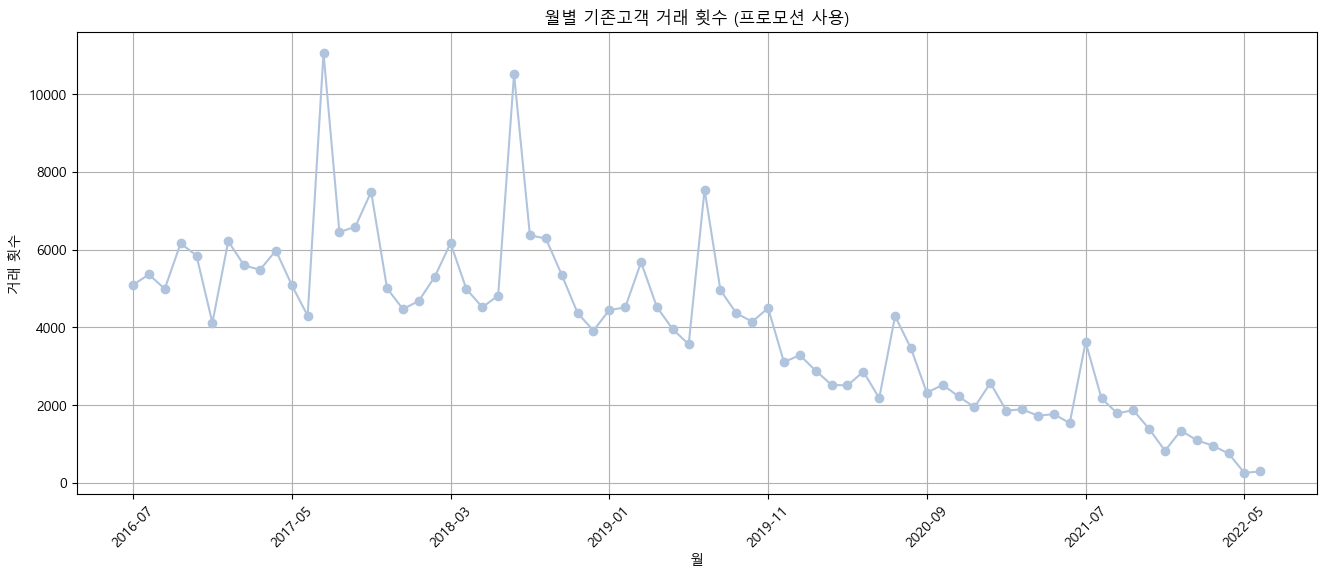

In [ ]:
# df_del = df.drop_duplicates(['created_at']).sort_values(by='created_at').reset_index(drop=True)
# existing_customer = df_del.query('customer_category == "기존고객" and promo_code != "Not Promoted"')
# data = existing_customer.groupby('first_join_month')['customer_id'].count()

# plt.figure(figsize=(16, 6))
# plt.rcParams['font.family'] = 'Malgun Gothic'

# data.plot(marker='o', color='lightsteelblue')

# plt.xlabel('월')
# plt.ylabel('거래 횟수')
# plt.title('월별 기존고객 거래 횟수 (프로모션 사용)')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()

### 이탈 기준 정의

In [ ]:
# 마지막 거래로부터 지난 기간
df = df.sort_values(by='created_at').reset_index(drop=True)
df_del = df.drop_duplicates(['created_at']).reset_index(drop=True)
df_del['created_at'] = pd.to_datetime(df_del['created_at'])
df_del

,created_at,customer_id,payment_method,promo_amount,promo_code,product_id,year,buy_age,price,transaction_month,first_join_date,first_join_month,transaction_date,customer_category
0,2016-07-01 02:53:26.720195+00:00,6183,OVO,6053,XX2022,16059.0,2016,20,163539,2016-07,2016-07-01,2016-07,2016-07-01,신규고객
1,2016-07-01 09:45:51.803842+00:00,16228,Debit Card,0,Not Promoted,47650.0,2016,20,318792,2016-07,2016-07-01,2016-07,2016-07-01,신규고객
2,2016-07-01 22:32:45.218400+00:00,73773,Debit Card,0,Not Promoted,32185.0,2016,25,246670,2016-07,2016-06-30,2016-06,2016-07-01,신규고객
3,2016-07-02 05:28:40.302335+00:00,37770,Credit Card,0,Not Promoted,53010.0,2016,26,533010,2016-07,2016-07-02,2016-07,2016-07-02,신규고객
4,2016-07-02 13:42:58.570858+00:00,2181,Debit Card,0,Not Promoted,10991.0,2016,34,299345,2016-07,2016-07-02,2016-07,2016-07-02,신규고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815868,2022-07-31 23:58:07.937208+00:00,27522,Debit Card,0,Not Promoted,29021.0,2022,32,228288,2022-07,2022-07-31,2022-07,2022-07-31,신규고객
815869,2022-07-31 23:58:50.469277+00:00,81975,Debit Card,0,Not Promoted,13458.0,2022,19,210360,2022-07,2022-07-31,2022-07,2022-07-31,신규고객
815870,2022-07-31 23:58:53.821469+00:00,19551,Credit Card,5800,WEEKENDSERU,49571.0,2022,31,140642,2022-07,2022-07-31,2022-07,2022-07-31,신규고객
815871,2022-07-31 23:59:03.408424+00:00,22285,LinkAja,0,Not Promoted,27404.0,2022,24,150339,2022-07,2022-07-31,2022-07,2022-07-31,신규고객


In [ ]:
# 고객별로 데이터프레임을 그룹화하고 각 고객의 거래별 전 거래로부터 몇 일이 지났는지 계산
df_del.sort_values(by=['customer_id', 'created_at'], inplace=True)
df_del['last_transaction_daydiff'] = df_del.groupby('customer_id')['created_at'].diff().dt.days
df_del['last_transaction_daydiff'].fillna('first', inplace=True)
df_del

,created_at,customer_id,payment_method,promo_amount,promo_code,product_id,year,buy_age,price,transaction_month,first_join_date,first_join_month,transaction_date,customer_category,last_transaction_daydiff
77784,2018-08-25 18:54:03.844494+00:00,3,Credit Card,8073,WEEKENDMANTAP,56019.0,2018,32,834670,2018-08,2018-08-25,2018-08,2018-08-25,신규고객,first
83843,2018-09-22 18:42:52.844494+00:00,3,Credit Card,0,Not Promoted,30235.0,2018,32,153784,2018-09,2018-08-25,2018-08,2018-09-22,신규고객,27.0
90104,2018-10-20 19:07:54.844494+00:00,3,Credit Card,8828,WEEKENDSERU,32482.0,2018,32,123760,2018-10,2018-08-25,2018-08,2018-10-20,기존고객,28.0
96596,2018-11-17 19:09:49.844494+00:00,3,Credit Card,3415,WEEKENDSERU,48945.0,2018,32,251317,2018-11,2018-08-25,2018-08,2018-11-17,기존고객,28.0
103311,2018-12-15 19:33:50.844494+00:00,3,Credit Card,2645,LIBURDONG,59272.0,2018,32,173882,2018-12,2018-08-25,2018-08,2018-12-15,기존고객,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298801,2020-07-15 19:24:07.703960+00:00,99998,Credit Card,0,Not Promoted,37952.0,2020,6,137662,2020-07,2018-07-01,2018-07,2020-07-15,기존고객,185.0
393726,2021-01-17 21:22:28.703960+00:00,99998,Credit Card,8569,WEEKENDMANTAP,36564.0,2021,6,364747,2021-01,2018-07-01,2018-07,2021-01-17,기존고객,186.0
507091,2021-07-22 22:33:46.703960+00:00,99998,Debit Card,0,Not Promoted,4044.0,2021,7,485330,2021-07,2018-07-01,2018-07,2021-07-22,기존고객,186.0
649875,2022-01-25 00:54:09.703960+00:00,99998,Credit Card,1954,BUYMORE,22751.0,2022,7,142990,2022-01,2018-07-01,2018-07,2022-01-25,기존고객,186.0


In [ ]:
repurchase = df_del.query('last_transaction_daydiff != "first"').reset_index(drop=True)
repurchase

,created_at,customer_id,payment_method,promo_amount,promo_code,product_id,year,buy_age,price,transaction_month,first_join_date,first_join_month,transaction_date,customer_category,last_transaction_daydiff
0,2018-09-22 18:42:52.844494+00:00,3,Credit Card,0,Not Promoted,30235.0,2018,32,153784,2018-09,2018-08-25,2018-08,2018-09-22,신규고객,27.0
1,2018-10-20 19:07:54.844494+00:00,3,Credit Card,8828,WEEKENDSERU,32482.0,2018,32,123760,2018-10,2018-08-25,2018-08,2018-10-20,기존고객,28.0
2,2018-11-17 19:09:49.844494+00:00,3,Credit Card,3415,WEEKENDSERU,48945.0,2018,32,251317,2018-11,2018-08-25,2018-08,2018-11-17,기존고객,28.0
3,2018-12-15 19:33:50.844494+00:00,3,Credit Card,2645,LIBURDONG,59272.0,2018,32,173882,2018-12,2018-08-25,2018-08,2018-12-15,기존고객,28.0
4,2019-02-09 20:49:55.844494+00:00,3,Credit Card,0,Not Promoted,5748.0,2019,32,376296,2019-02,2018-08-25,2018-08,2019-02-09,기존고객,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765628,2020-01-11 20:26:40.703960+00:00,99998,Debit Card,4912,LIBURDONG,1935.0,2020,5,221250,2020-01,2018-07-01,2018-07,2020-01-11,기존고객,186.0
765629,2020-07-15 19:24:07.703960+00:00,99998,Credit Card,0,Not Promoted,37952.0,2020,6,137662,2020-07,2018-07-01,2018-07,2020-07-15,기존고객,185.0
765630,2021-01-17 21:22:28.703960+00:00,99998,Credit Card,8569,WEEKENDMANTAP,36564.0,2021,6,364747,2021-01,2018-07-01,2018-07,2021-01-17,기존고객,186.0
765631,2021-07-22 22:33:46.703960+00:00,99998,Debit Card,0,Not Promoted,4044.0,2021,7,485330,2021-07,2018-07-01,2018-07,2021-07-22,기존고객,186.0


In [ ]:
first = df_del.query('last_transaction_daydiff == "first"').reset_index(drop=True)
first.rename(columns={'last_transaction_daydiff':'transaction_daydiff_median'}, inplace=True)

median = repurchase.groupby('customer_id', as_index=False)['last_transaction_daydiff'].median()
median.rename(columns={'last_transaction_daydiff':'transaction_daydiff_median'}, inplace=True)
median

daydiff_dict = {}
for i in range(len(first)):
    daydiff_dict[first['customer_id'][i]] = first['transaction_daydiff_median'][i]
for i in range(len(median)):
    daydiff_dict[median['customer_id'][i]] = median['transaction_daydiff_median'][i]

print(daydiff_dict)

{3: 28.0, 8: 76.0, 9: 67.0, 11: 'first', 15: 207.0, 17: 671.0, 18: 43.0, 20: 5.0, 21: 'first', 24: 49.0, 26: 'first', 27: 183.0, 28: 22.0, 32: 90.5, 36: 917.0, 40: 'first', 41: 'first', 45: 19.0, 46: 185.0, 47: 88.0, 48: 158.0, 50: 707.0, 57: 51.0, 61: 113.0, 65: 583.0, 67: 246.0, 68: 29.0, 71: 51.0, 75: 'first', 76: 8.0, 79: 96.0, 81: 397.0, 83: 690.0, 87: 42.0, 88: 31.0, 89: 83.0, 90: 280.5, 91: 408.0, 92: 94.0, 93: 40.0, 95: 67.0, 98: 11.0, 100: 1088.0, 102: 5.0, 104: 63.0, 107: 13.0, 108: 263.0, 109: 57.0, 110: 226.0, 111: 47.0, 114: 'first', 115: 18.0, 116: 95.0, 117: 34.0, 118: 58.0, 119: 34.0, 120: 'first', 121: 3.0, 122: 10.0, 123: 253.0, 125: 182.0, 126: 29.0, 127: 146.0, 131: 'first', 133: 448.0, 134: 409.5, 136: 57.0, 139: 3.0, 141: 609.0, 142: 6.0, 145: 35.0, 147: 32.0, 149: 90.0, 150: 110.0, 151: 466.0, 152: 65.0, 153: 88.0, 154: 166.0, 155: 29.0, 156: 25.0, 158: 2.0, 159: 'first', 160: 13.0, 161: 23.0, 163: 164.0, 165: 'first', 168: 16.0, 169: 294.0, 170: 126.0, 171: 136.

In [ ]:
print(len(daydiff_dict))
print(len(df['customer_id'].unique()))

50240
50240


In [ ]:
cu['transaction_daydiff_median'] = cu['customer_id'].map(daydiff_dict)
cu = cu.sort_values(by='customer_id').reset_index(drop=True)
cu

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date,first_join_month,churn,transaction_daydiff_median
0,1,F,25,18,iPhone,7.1.2,7,-2.728020,114.215521,Kalimantan Tengah,1999-03-12,2016-11-27,2016-11,not_purchased,NaN
1,2,F,33,31,Android,4.3,4,-6.010465,107.292582,Jawa Barat,1991-01-18,2021-12-25,2021-12,not_purchased,NaN
2,3,M,38,33,Android,3.2.3,3,-6.151858,106.945839,Jakarta Raya,1986-07-12,2018-08-25,2018-08,F,28.0
3,4,F,29,27,Android,1.1,1,0.349326,109.061486,Kalimantan Barat,1995-03-17,2021-03-22,2021-03,not_purchased,NaN
4,5,M,30,28,iPad,4.2.1,4,-6.138983,106.873723,Jakarta Raya,1994-07-21,2021-12-18,2021-12,not_purchased,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,M,21,20,Android,3.2.2,3,-3.699470,120.047102,Sulawesi Selatan,2003-11-14,2022-04-13,2022-04,not_purchased,NaN
99996,99997,M,20,17,iPhone,12.4.8,12,-8.791134,118.804722,Nusa Tenggara Barat,2004-10-06,2020-04-25,2020-04,T,first
99997,99998,F,10,5,Android,3.2.3,3,-4.092411,105.179376,Lampung,2014-05-21,2018-07-01,2018-07,T,186.0
99998,99999,M,14,7,Android,3.2.1,3,-4.876648,104.598266,Lampung,2010-02-11,2016-10-12,2016-10,T,first


In [ ]:
# 결측치 : 0회 구매
# first : 1회 구매
# 그 외 : 구매 주기(중앙값)

In [ ]:
a = repurchase.groupby('customer_id', as_index=False)['last_transaction_daydiff'].median()
a

,customer_id,last_transaction_daydiff
0,3,28.0
1,8,76.0
2,9,67.0
3,15,207.0
4,17,671.0
...,...,...
39973,99989,120.0
39974,99991,175.0
39975,99992,63.0
39976,99995,12.0


In [ ]:
a['last_transaction_daydiff'].mean()

155.13953924658563

In [ ]:
a['last_transaction_daydiff'].median()

74.0

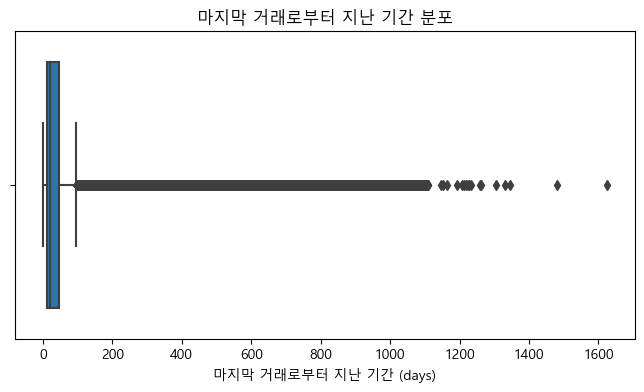

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=repurchase, x='last_transaction_daydiff')

plt.xlabel('마지막 거래로부터 지난 기간 (days)')
plt.title('마지막 거래로부터 지난 기간 분포')
plt.show()

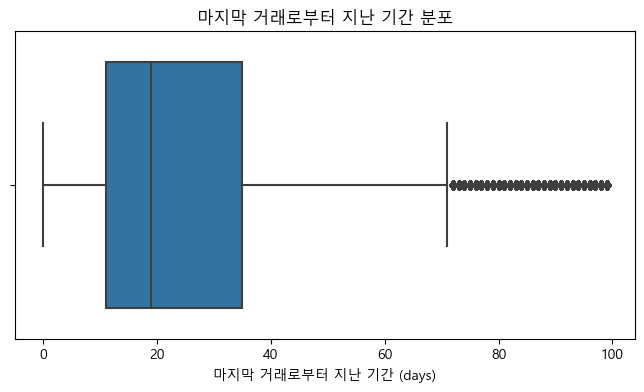

In [ ]:
repurchase2 = repurchase.query('last_transaction_daydiff < 100')

plt.figure(figsize=(8, 4))
sns.boxplot(data=repurchase2, x='last_transaction_daydiff')

plt.xlabel('마지막 거래로부터 지난 기간 (days)')
plt.title('마지막 거래로부터 지난 기간 분포')
plt.show()

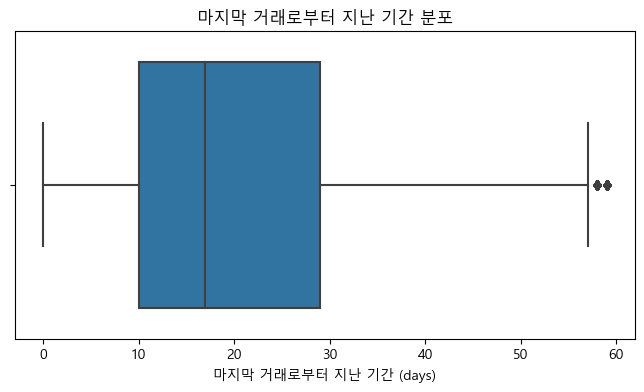

In [ ]:
repurchase3 = repurchase.query('last_transaction_daydiff < 60')

plt.figure(figsize=(8, 4))
sns.boxplot(data=repurchase3, x='last_transaction_daydiff')

plt.xlabel('마지막 거래로부터 지난 기간 (days)')
plt.title('마지막 거래로부터 지난 기간 분포')
plt.show()

In [ ]:
# 보통 2달 안에 많이 재구매 → 이탈률을 2개월을 기준으로 설정

### 이탈률

In [ ]:
df['join_transaction_daydiff'] = (pd.to_datetime(df['transaction_date']) - pd.to_datetime(df['first_join_date'])).dt.days
df

,created_at,customer_id,payment_method,promo_amount,promo_code,product_id,year,buy_age,price,transaction_month,first_join_date,first_join_month,transaction_date,customer_category,join_transaction_daydiff
0,2016-07-01 02:53:26.720195+00:00,6183,OVO,6053,XX2022,16059.0,2016,20,163539,2016-07,2016-07-01,2016-07,2016-07-01,신규고객,0
1,2016-07-01 02:53:26.720195+00:00,6183,OVO,6053,XX2022,7588.0,2016,20,411340,2016-07,2016-07-01,2016-07,2016-07-01,신규고객,0
2,2016-07-01 09:45:51.803842+00:00,16228,Debit Card,0,Not Promoted,47650.0,2016,20,318792,2016-07,2016-07-01,2016-07,2016-07-01,신규고객,0
3,2016-07-01 22:32:45.218400+00:00,73773,Debit Card,0,Not Promoted,32185.0,2016,25,246670,2016-07,2016-06-30,2016-06,2016-07-01,신규고객,1
4,2016-07-02 05:28:40.302335+00:00,37770,Credit Card,0,Not Promoted,53010.0,2016,26,533010,2016-07,2016-07-02,2016-07,2016-07-02,신규고객,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200866,2022-07-31 23:58:50.469277+00:00,81975,Debit Card,0,Not Promoted,34120.0,2022,19,265409,2022-07,2022-07-31,2022-07,2022-07-31,신규고객,0
1200867,2022-07-31 23:58:50.469277+00:00,81975,Debit Card,0,Not Promoted,29275.0,2022,19,276340,2022-07,2022-07-31,2022-07,2022-07-31,신규고객,0
1200868,2022-07-31 23:58:53.821469+00:00,19551,Credit Card,5800,WEEKENDSERU,49571.0,2022,31,140642,2022-07,2022-07-31,2022-07,2022-07-31,신규고객,0
1200869,2022-07-31 23:59:03.408424+00:00,22285,LinkAja,0,Not Promoted,27404.0,2022,24,150339,2022-07,2022-07-31,2022-07,2022-07-31,신규고객,0


In [ ]:
start_date = datetime(2016, 7, 1)
end_date = datetime(2022, 4, 1)
date_range = [start_date + pd.DateOffset(months=i) for i in range((end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1)]
date_list1 = [pd.Timestamp(date) for date in date_range]

start_date = datetime(2016, 9, 1)
end_date = datetime(2022, 6, 1)
date_range = [start_date + pd.DateOffset(months=i) for i in range((end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1)]
date_list2 = [pd.Timestamp(date) for date in date_range]

start_date = datetime(2016, 11, 1)
end_date = datetime(2022, 8, 1)
date_range = [start_date + pd.DateOffset(months=i) for i in range((end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1)]
date_list3 = [pd.Timestamp(date) for date in date_range]

start_date = pd.Timestamp('2016-10-01')
end_date = pd.Timestamp('2022-07-01')
date_list4 = [pd.Period(year=start_date.year, month=start_date.month + i, freq='M') for i in range((end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1)]
date_list4 = [str(period) for period in date_list4]

print(date_list1) # 가입일
print(date_list2) # 거래 측정 시작
print(date_list3) # 거래 측정 끝
print(date_list4) # 이탈률 측정 (그래프에 표시)

print(len(date_list3))
print(len(date_list4))

[Timestamp('2016-07-01 00:00:00'), Timestamp('2016-08-01 00:00:00'), Timestamp('2016-09-01 00:00:00'), Timestamp('2016-10-01 00:00:00'), Timestamp('2016-11-01 00:00:00'), Timestamp('2016-12-01 00:00:00'), Timestamp('2017-01-01 00:00:00'), Timestamp('2017-02-01 00:00:00'), Timestamp('2017-03-01 00:00:00'), Timestamp('2017-04-01 00:00:00'), Timestamp('2017-05-01 00:00:00'), Timestamp('2017-06-01 00:00:00'), Timestamp('2017-07-01 00:00:00'), Timestamp('2017-08-01 00:00:00'), Timestamp('2017-09-01 00:00:00'), Timestamp('2017-10-01 00:00:00'), Timestamp('2017-11-01 00:00:00'), Timestamp('2017-12-01 00:00:00'), Timestamp('2018-01-01 00:00:00'), Timestamp('2018-02-01 00:00:00'), Timestamp('2018-03-01 00:00:00'), Timestamp('2018-04-01 00:00:00'), Timestamp('2018-05-01 00:00:00'), Timestamp('2018-06-01 00:00:00'), Timestamp('2018-07-01 00:00:00'), Timestamp('2018-08-01 00:00:00'), Timestamp('2018-09-01 00:00:00'), Timestamp('2018-10-01 00:00:00'), Timestamp('2018-11-01 00:00:00'), Timestamp('20

In [ ]:
# 이탈률
cu['first_join_date'] = pd.to_datetime(cu['first_join_date'])

monthly_churn_rate = []  # 총 이탈률
monthly_churn_count = []  # 월별 이탈고객 수

churn_dict = {}

for i in range(len(date_list1)):
    total_customer = set(cu.query(f'first_join_date < "{date_list1[i]}"')['customer_id'])  # 전제 조건 (가입 후 2개월 이상된 회원)

    data = df.query(f'"{date_list2[i]}" <= transaction_date < "{date_list3[i]}"')
    active_customer = set(data['customer_id'])

    churn = set(total_customer) - set(active_customer)
    
    churn_rate = len(churn) / len(set(total_customer))
    monthly_churn_rate.append(churn_rate * 100)
    monthly_churn_count.append(len(churn))

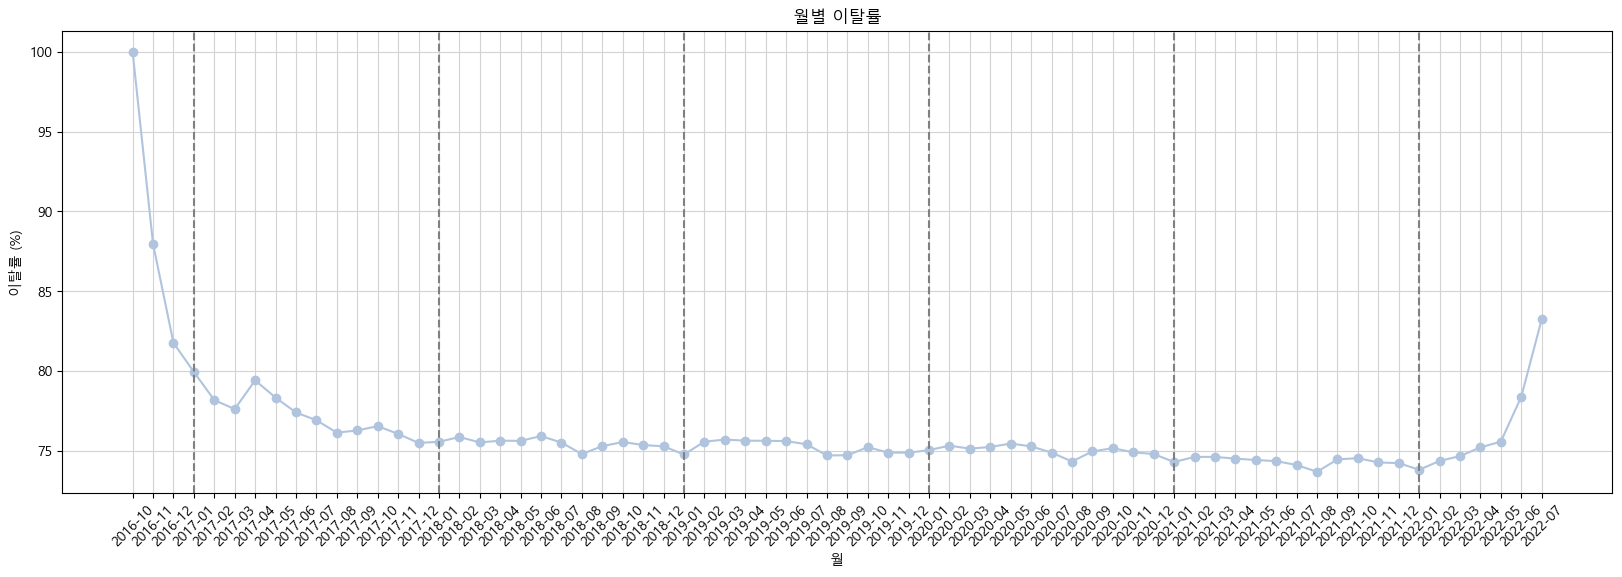

In [ ]:
# 총 이탈률 그래프 시각화
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(date_list4, monthly_churn_rate, color='lightsteelblue', marker='o')

# 각 연도의 시작일에 세로선 그리기
for year_start in ['2017-01', '2018-01', '2019-01', '2020-01', '2021-01', '2022-01']:
    ax.axvline(x=year_start, color='gray', linestyle='--')

plt.xlabel('월')
plt.ylabel('이탈률 (%)')
plt.title('월별 이탈률')
plt.grid(True, color='lightgray')
plt.xticks(date_list4, rotation=45)
plt.show()

In [ ]:
# 2022년 6월을 기점으로 이탈률이 상승하는 추세임

# 2022년 6월을 기준으로 이전/이후 구매경향을 보면 좋을 것 같음 (일회성 구매자가 대폭 증가?)
# >> 이탈 예측 모델을 만들어 어떤 고객이 이탈할 가능성이 있는지 파악 필요 및 이탈방지 프로모션 모색

In [ ]:
# 신규고객의 이탈률




### 가설 검정

가설 검정 : 어떠한 추측이나 가설에 대하여, 해당 가설의 타당성을 조사하는 것

→ 주장의 타당성을 높이기 위해 실행

In [ ]:
data = {'Date': date_list4, 'Monthly_Churn_Rate': monthly_churn_rate}
data = pd.DataFrame(data)
data

,Date,Monthly_Churn_Rate
0,2016-10,100.000000
1,2016-11,87.966306
2,2016-12,81.753707
3,2017-01,79.930495
4,2017-02,78.165253
...,...,...
65,2022-03,74.655874
66,2022-04,75.202008
67,2022-05,75.561641
68,2022-06,78.378559


In [ ]:
# 가설) 이탈률이 상승했다

# H0 : μ1 ≥ μ2 (이탈률 상승 X)
# H1 : μ1 < μ2 (이탈률 상승 O)

# μ1(총 이탈률)  /  μ2(최근 이탈률)

In [ ]:
# μ1 (총 이탈률(시작 후 1년치 이탈률 제거))
data1 = data.iloc[10:]['Monthly_Churn_Rate'].reset_index(drop=True)
mu1 = np.mean(data1)  # μ1

# μ2 (최근 이탈률)
data2 = data.iloc[68:]['Monthly_Churn_Rate'].reset_index(drop=True)
mu2 = np.mean(data2)  # μ2

print(mu1)
print(mu2)

75.27135007030755
80.80333774373955


**신뢰구간 확인**

In [ ]:
# 총 이탈률에서 10,000번 랜덤으로 샘플을 꺼내 평균을 계산한뒤 리스트에 저장

churn_rate_means = []

for i in range(10000):
  sample = data1.sample(data1.shape[0], replace=True)
  churn_rate_means.append(sample.mean())

print(churn_rate_means)

[75.34614060678163, 75.2803843750599, 75.59964874593793, 75.0564084772866, 75.15401509579546, 75.30596832699352, 75.28616346277548, 75.42507000272646, 75.31308678919049, 75.20758110994706, 75.31843432608477, 75.13487347031754, 75.01766966809758, 75.1784300632131, 75.60539261627882, 75.53708501669149, 75.16898795815969, 75.55367664592224, 75.03451457814386, 75.2886575932128, 75.17009557459023, 75.15358351983718, 75.1756613787086, 75.00650125874954, 75.5565322249293, 75.31922944364491, 75.19492944826878, 75.12475545789674, 75.08783547108516, 74.96779313318339, 75.39452103201204, 75.39814206439604, 74.92103252619972, 75.08216937501, 75.52081620473426, 75.15486721098691, 75.36424587160637, 75.5077939024088, 75.06720424800368, 75.53869619533587, 75.21339568167012, 74.9529039998713, 75.14443107503887, 75.55513996282227, 75.37896509823231, 75.35565330438175, 75.30714054145264, 75.02900596195302, 75.33868631133005, 75.30292116118558, 75.15472942634759, 75.22150662763673, 75.01771617428172, 75.

In [ ]:
# H0 : μ1 = μ2 (이탈률 상승 X)
# H1 : μ1 ≠ μ2 (이탈률 상승 O)

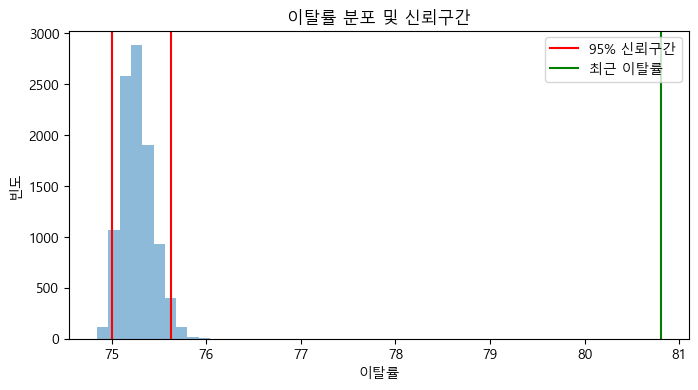

In [ ]:
# 신뢰구간
plt.figure(figsize=(8, 4))
plt.hist(churn_rate_means, alpha=0.5)
plt.axvline(x=np.percentile(churn_rate_means, 2.5), color='r', label='95% 신뢰구간')
plt.axvline(x=np.percentile(churn_rate_means, 97.5), color='r')
plt.axvline(x=mu2, color='g', label='최근 이탈률')

plt.legend(loc='upper right')
plt.xlabel('이탈률')
plt.ylabel('빈도')
plt.title('이탈률 분포 및 신뢰구간')
plt.show()

In [ ]:
# 총 이탈률 ≠ 최근 이탈률

**p-value 확인**

- 어떤 사건이 우연히 발생할 확률

  → 우연히 발생할 확률이 5%보다 작다 = 어떤 사건이 우연히 일어났을 가능성이 거의 없다 (인과관계 존재)

  (귀무 가설이 맞다는 전제 하에, 귀무 가설이 우연히 발생할 확률

  → 귀무가설이 우연히 발생할 확률이 5%보다 작다 → 귀무가설 기각)

- p-value가 작을수록 귀무가설을 기각

- 제1종오류가 발생할 확률

In [ ]:
cu['churn'] = cu['churn'].replace('not_purchased', 'T')
cu['churn'] = cu['churn'].replace('T', 1)
cu['churn'] = cu['churn'].replace('F', 0)

In [ ]:
# 통계량
mu2 = np.mean(data2)
sigma = np.std(data2, ddof=1)
n = len(data2)

# z-value
z = (mu2-mu1)/(sigma/math.sqrt(n))

# p-value
p_value = 1- stats.norm.cdf(z, 0, 1)
print(p_value)

0.011261213931181069


In [ ]:
p_value < 0.05

True

#### 프로모션

In [ ]:
promo = df.query('promo_code != "Not Promoted"')
nopromo = df.query('promo_code == "Not Promoted"')

print(promo.shape[0])
print(nopromo.shape[0])

460896
739975


In [ ]:
# 프로모션 적용/비적용 거래 횟수
lenpromo = len(promo['created_at'].unique())
lennopromo = len(nopromo['created_at'].unique())

print(lenpromo)
print(lennopromo)

312558
503315


In [ ]:
promo['price'].sum() / lenpromo

543897.6604758156

In [ ]:
nopromo['price'].sum() / lennopromo

542597.7352115475

### 고객 분류

In [ ]:
last_transaction = df.drop_duplicates(['customer_id'], keep='last')

standard_date = pd.to_datetime('2022-08-01')
last_transaction['recency'] = standard_date - last_transaction['transaction_date']
last_transaction['recency'] = last_transaction['recency'].astype(str).apply(lambda x: str(x)[:-5]).astype(int)

cu = pd.merge(cu, last_transaction[['customer_id', 'recency']], on='customer_id', how='outer')

In [ ]:
standard_date = pd.to_datetime('2022-08-01')

cu['until_now'] = (standard_date - cu['first_join_date']).dt.days
cu['until_now'] = cu['until_now'] / (365/6)  # 2개월이 몇 번 돌았는지
cu

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date,first_join_month,churn,transaction_daydiff_median,recency,until_now
0,1,F,25,18,iPhone,7.1.2,7,-2.728020,114.215521,Kalimantan Tengah,1999-03-12,2016-11-27,2016-11,1,NaN,NaN,34.076712
1,2,F,33,31,Android,4.3,4,-6.010465,107.292582,Jawa Barat,1991-01-18,2021-12-25,2021-12,1,NaN,NaN,3.600000
2,3,M,38,33,Android,3.2.3,3,-6.151858,106.945839,Jakarta Raya,1986-07-12,2018-08-25,2018-08,0,28.0,36.0,23.621918
3,4,F,29,27,Android,1.1,1,0.349326,109.061486,Kalimantan Barat,1995-03-17,2021-03-22,2021-03,1,NaN,NaN,8.169863
4,5,M,30,28,iPad,4.2.1,4,-6.138983,106.873723,Jakarta Raya,1994-07-21,2021-12-18,2021-12,1,NaN,NaN,3.715068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,M,21,20,Android,3.2.2,3,-3.699470,120.047102,Sulawesi Selatan,2003-11-14,2022-04-13,2022-04,1,NaN,NaN,1.808219
99996,99997,M,20,17,iPhone,12.4.8,12,-8.791134,118.804722,Nusa Tenggara Barat,2004-10-06,2020-04-25,2020-04,1,first,828.0,13.610959
99997,99998,F,10,5,Android,3.2.3,3,-4.092411,105.179376,Lampung,2014-05-21,2018-07-01,2018-07,1,186.0,188.0,24.526027
99998,99999,M,14,7,Android,3.2.1,3,-4.876648,104.598266,Lampung,2010-02-11,2016-10-12,2016-10,1,first,2119.0,34.832877


In [ ]:
cu2 = cu[['customer_id', 'transaction_daydiff_median', 'churn', 'until_now', 'recency']]

def purchased_category(row):
    if pd.isna(row['transaction_daydiff_median']):
        return 0  # 0회 구매
    elif row['transaction_daydiff_median'] == "first":
        return 1  # 1회 구매
    else:
        return 2  # 2회 이상 구매

cu2['purchased_category'] = cu2.apply(purchased_category, axis=1)
cu2 = cu2[['customer_id', 'transaction_daydiff_median', 'churn', 'purchased_category', 'until_now', 'recency']]
cu2

,customer_id,transaction_daydiff_median,churn,purchased_category,until_now,recency
0,1,NaN,1,0,34.076712,NaN
1,2,NaN,1,0,3.600000,NaN
2,3,28.0,0,2,23.621918,36.0
3,4,NaN,1,0,8.169863,NaN
4,5,NaN,1,0,3.715068,NaN
...,...,...,...,...,...,...
99995,99996,NaN,1,0,1.808219,NaN
99996,99997,first,1,1,13.610959,828.0
99997,99998,186.0,1,2,24.526027,188.0
99998,99999,first,1,1,34.832877,2119.0


In [ ]:
price = df.groupby('customer_id')['price'].sum()
cu2 = pd.merge(cu2, price, on='customer_id', how='outer')
cu2['price_per_unit'] = (cu2['price'] / cu2['until_now']).round(-2)
cu2.rename(columns={'price_per_unit':'monetary_per_unit'}, inplace=True)
cu2

,customer_id,transaction_daydiff_median,churn,purchased_category,until_now,recency,price,monetary_per_unit
0,1,NaN,1,0,34.076712,NaN,NaN,NaN
1,2,NaN,1,0,3.600000,NaN,NaN,NaN
2,3,28.0,0,2,23.621918,36.0,20676434.0,875300.0
3,4,NaN,1,0,8.169863,NaN,NaN,NaN
4,5,NaN,1,0,3.715068,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
99995,99996,NaN,1,0,1.808219,NaN,NaN,NaN
99996,99997,first,1,1,13.610959,828.0,216461.0,15900.0
99997,99998,186.0,1,2,24.526027,188.0,6667865.0,271900.0
99998,99999,first,1,1,34.832877,2119.0,186111.0,5300.0


In [ ]:
cu2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   purchase_cycle      50240 non-null   object 
 2   churn               100000 non-null  int64  
 3   purchased_category  100000 non-null  int64  
 4   until_now           100000 non-null  float64
 5   recency             50240 non-null   float64
 6   price               50240 non-null   float64
 7   monetary_per_unit   50240 non-null   float64
 8   frequency           50240 non-null   float64
 9   frequency_per_unit  50240 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 7.6+ MB


In [ ]:
cu2['purchase_cycle']

0          NaN
1          NaN
2         28.0
3          NaN
4          NaN
         ...  
99995      NaN
99996    first
99997    186.0
99998    first
99999      NaN
Name: purchase_cycle, Length: 100000, dtype: object

In [ ]:
f = df_del.groupby('customer_id', as_index=False)['created_at'].count()
cu2 = pd.merge(cu2, f, on='customer_id', how='outer')
cu2.rename(columns={'created_at':'frequency'}, inplace=True)
cu2.rename(columns={'transaction_daydiff_median':'purchase_cycle'}, inplace=True)  # 구매주기

cu2['frequency_per_unit'] = cu2['frequency'] / cu2['until_now']
cu2['recency_per_cycle'] = cu2['recency'] / cu2['purchase_cycle']
cu2

TypeError: unsupported operand type(s) for /: 'float' and 'str'

In [ ]:
data = cu2[['customer_id', 'monetary_per_unit', 'frequency_per_unit', 'recency_per_cycle']]
# data.fillna(0, inplace=True)
data

,customer_id,monetary_per_unit,frequency_per_unit,recency(churn),recency
0,1,NaN,NaN,1,NaN
1,2,NaN,NaN,1,NaN
2,3,875300.0,2.074345,0,36.0
3,4,NaN,NaN,1,NaN
4,5,NaN,NaN,1,NaN
...,...,...,...,...,...
99995,99996,NaN,NaN,1,NaN
99996,99997,15900.0,0.073470,1,828.0
99997,99998,271900.0,0.326184,1,188.0
99998,99999,5300.0,0.028709,1,2119.0


In [ ]:
# nan값은 클러스터 임의로 지정 예정
data2 = data.dropna().reset_index(drop=True)
data2

,customer_id,monetary_per_unit,frequency_per_unit,recency(churn),recency
0,3,875300.0,2.074345,0,36.0
1,8,439900.0,0.797441,1,78.0
2,9,395000.0,0.910224,1,65.0
3,11,78900.0,0.411036,1,147.0
4,15,123100.0,0.293031,1,208.0
...,...,...,...,...,...
50235,99992,338100.0,0.958005,1,68.0
50236,99995,2634200.0,5.019814,0,3.0
50237,99997,15900.0,0.073470,1,828.0
50238,99998,271900.0,0.326184,1,188.0


#### monetary

<Axes: xlabel='monetary_per_unit', ylabel='Density'>

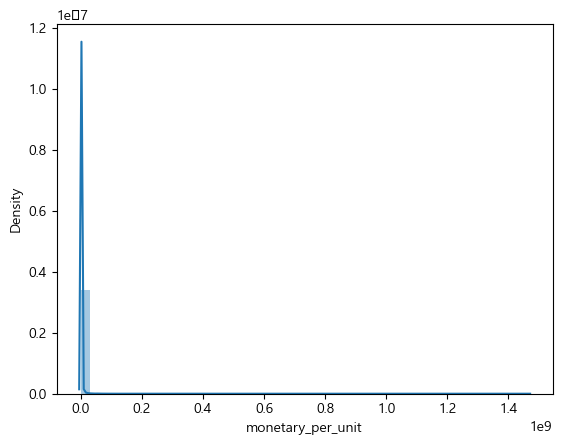

In [ ]:
sns.distplot(data2["monetary_per_unit"])

<Axes: xlabel='monetary_per_unit', ylabel='Density'>

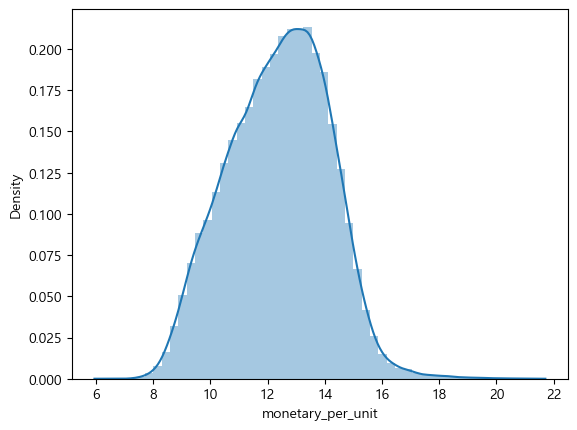

In [ ]:
monetary_log = np.log1p(data2["monetary_per_unit"])
sns.distplot(monetary_log)

#### frequency

<Axes: xlabel='frequency_per_unit', ylabel='Density'>

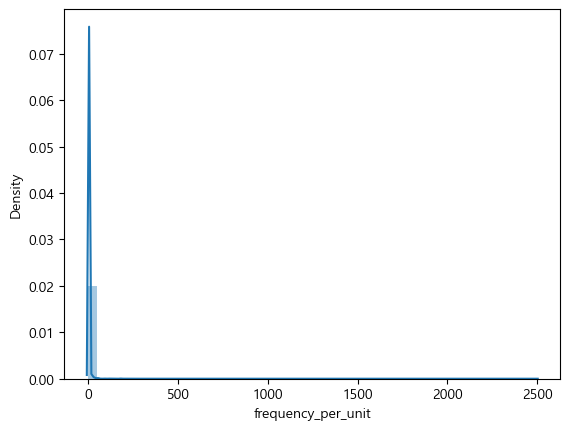

In [ ]:
sns.distplot(data2["frequency_per_unit"])

<Axes: xlabel='frequency_per_unit', ylabel='Density'>

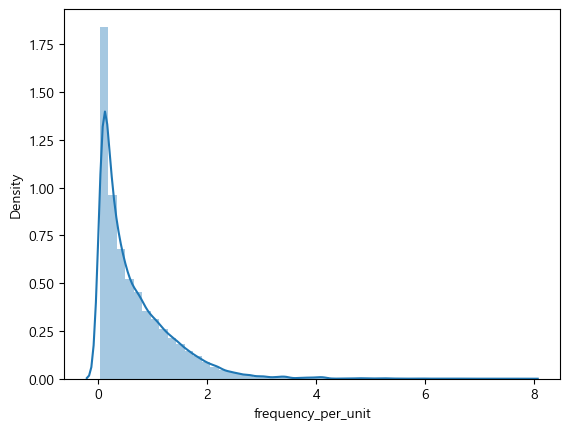

In [ ]:
frequency_log = np.log1p(data2["frequency_per_unit"])
sns.distplot(frequency_log)

### 고객분류에 따른 분석

### 해결 방안